In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import cufflinks as cf
from pandas_datareader import data
from pandas.tseries.frequencies import to_offset
import csv
from scipy.optimize import brute
plt.style.use("seaborn")

## 4. Quantitative Strategy

In [2]:
#training
train_start='2002-06-01'
train_end='2016-07-07'
#Test
test_start='2016-07-08'
test_end='2022-06-01'

## 4.1. Designing strategy over the training Set for Standar MACD Parameters

In [3]:
#Class created
#from MACDBacktester import MACDBacktester as MACD

In [4]:
#Class created
from MACDBacktester_2 import MACDBacktester_2 as MACD_2

In [5]:
standar_MACD = MACD_2("^GSPC", EMA_S = 12, EMA_L = 26, signal_mw = 9, 
                  start = train_start, end = train_end, tc = 0)

[*********************100%***********************]  1 of 1 completed


C:\Users\pcalatayud\Desktop\jupyter\TFM\Chapter 4\MACDBacktester_2.py:72: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [6]:
data = standar_MACD.test_strategy()

Strategy Performance: 0.973
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.365
Hold and Buy Drawdown: 0.568
parameters: 12, 26, 9


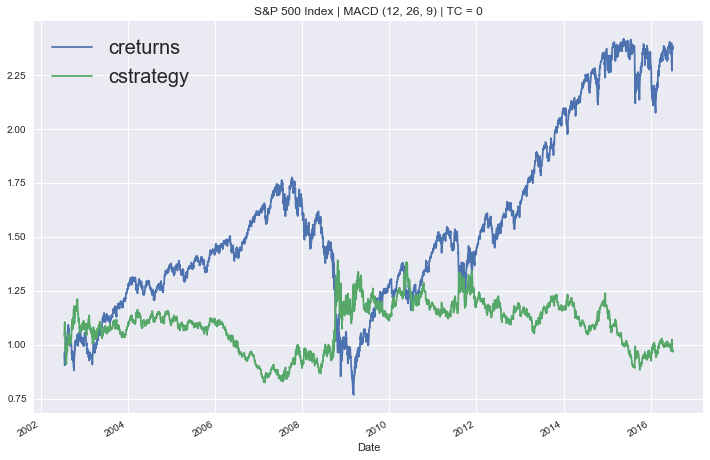

In [7]:
standar_MACD.plot_results()

In [8]:
df=data[4]

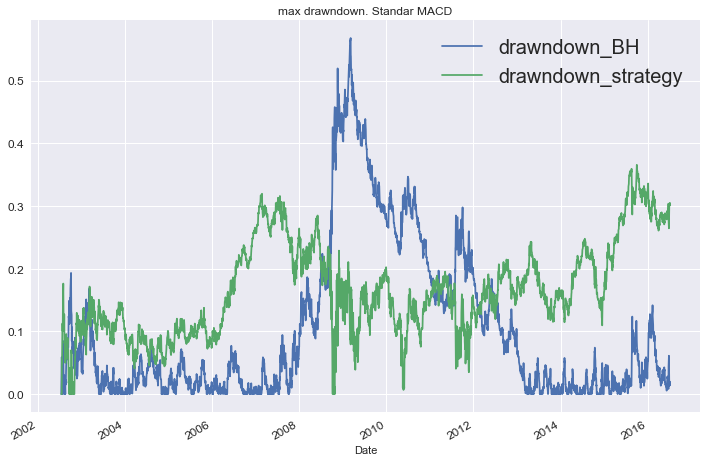

In [9]:
df[["drawndown_BH","drawndown_strategy"]].dropna().plot(figsize = (12, 8), title = "max drawndown. Standar MACD", fontsize = 12)
plt.rc('legend',fontsize=20) # using a size in points
plt.show()

## 4.2. Optimizing MACD Parameters

## 4.2.1. Optimizing MACD Short and Long EMA

In [135]:
standar_MACD

MACDBacktester(symbol = ^GSPC, MACD(5, 29, 17), start = 2002-06-01, end = 2016-07-07)

In [104]:
#Looking for robust parameters
signal_opt = range(5,30,1)
short_opt =  range(3,25,1)  
long_opt = range(25,45,1)

In [105]:
#Initialize empty Data Frame with index and columns determined
#accumulation = pd.DataFrame(0,index=long_opt, columns=short_opt)
best_parameters = pd.DataFrame(columns=["Performance","Short","Long","Signal","benchmark"])

In [106]:
#Running the loop
for k in signal_opt:
    val = pd.DataFrame(0,index=long_opt, columns=short_opt)
    for j in short_opt:
        for i in long_opt:
            #Set up Parameters
            standar_MACD.set_parameters(j,i,k)
            #Runing Strategy
            output = standar_MACD.test_strategy()
            #First argument is the row, the second one is the column
            #Saving important data
            if float(output[0])>1:
                list_row = [float(output[0]),j,i,k,float(output[1])]
                best_parameters.loc[len(best_parameters)] = list_row

Strategy Performance: 0.199
Hold and Buy Performance: 2.264
Strategy Maximun Drawdown: 0.849
Hold and Buy Drawdown: 0.568
parameters: 3, 25, 5
Strategy Performance: 0.204
Hold and Buy Performance: 2.279
Strategy Maximun Drawdown: 0.844
Hold and Buy Drawdown: 0.568
parameters: 3, 26, 5
Strategy Performance: 0.229
Hold and Buy Performance: 2.287
Strategy Maximun Drawdown: 0.827
Hold and Buy Drawdown: 0.568
parameters: 3, 27, 5
Strategy Performance: 0.223
Hold and Buy Performance: 2.331
Strategy Maximun Drawdown: 0.83
Hold and Buy Drawdown: 0.568
parameters: 3, 28, 5
Strategy Performance: 0.207
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.844
Hold and Buy Drawdown: 0.568
parameters: 3, 29, 5
Strategy Performance: 0.213
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.834
Hold and Buy Drawdown: 0.568
parameters: 3, 30, 5
Strategy Performance: 0.212
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.83
Hold and Buy Drawdown: 0.568
parameters: 3, 31, 5
S

Strategy Performance: 0.451
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.59
Hold and Buy Drawdown: 0.568
parameters: 6, 38, 5
Strategy Performance: 0.446
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.577
Hold and Buy Drawdown: 0.568
parameters: 6, 39, 5
Strategy Performance: 0.432
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.604
Hold and Buy Drawdown: 0.568
parameters: 6, 40, 5
Strategy Performance: 0.488
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.564
Hold and Buy Drawdown: 0.568
parameters: 6, 41, 5
Strategy Performance: 0.517
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.554
Hold and Buy Drawdown: 0.568
parameters: 6, 42, 5
Strategy Performance: 0.525
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.544
Hold and Buy Drawdown: 0.568
parameters: 6, 43, 5
Strategy Performance: 0.486
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.595
Hold and Buy Drawdown: 0.568
parameters: 6, 44, 5
S

Strategy Performance: 0.409
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.69
Hold and Buy Drawdown: 0.568
parameters: 9, 38, 5
Strategy Performance: 0.378
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.692
Hold and Buy Drawdown: 0.568
parameters: 9, 39, 5
Strategy Performance: 0.35
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.707
Hold and Buy Drawdown: 0.568
parameters: 9, 40, 5
Strategy Performance: 0.363
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.694
Hold and Buy Drawdown: 0.568
parameters: 9, 41, 5
Strategy Performance: 0.348
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.717
Hold and Buy Drawdown: 0.568
parameters: 9, 42, 5
Strategy Performance: 0.354
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.72
Hold and Buy Drawdown: 0.568
parameters: 9, 43, 5
Strategy Performance: 0.414
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.679
Hold and Buy Drawdown: 0.568
parameters: 9, 44, 5
Str

Strategy Performance: 0.606
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.526
Hold and Buy Drawdown: 0.568
parameters: 12, 37, 5
Strategy Performance: 0.616
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.52
Hold and Buy Drawdown: 0.568
parameters: 12, 38, 5
Strategy Performance: 0.509
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.599
Hold and Buy Drawdown: 0.568
parameters: 12, 39, 5
Strategy Performance: 0.563
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.57
Hold and Buy Drawdown: 0.568
parameters: 12, 40, 5
Strategy Performance: 0.545
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.576
Hold and Buy Drawdown: 0.568
parameters: 12, 41, 5
Strategy Performance: 0.592
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.537
Hold and Buy Drawdown: 0.568
parameters: 12, 42, 5
Strategy Performance: 0.585
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.556
Hold and Buy Drawdown: 0.568
parameters: 12, 4

Strategy Performance: 0.901
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.354
Hold and Buy Drawdown: 0.568
parameters: 15, 36, 5
Strategy Performance: 0.862
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.384
Hold and Buy Drawdown: 0.568
parameters: 15, 37, 5
Strategy Performance: 0.888
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.381
Hold and Buy Drawdown: 0.568
parameters: 15, 38, 5
Strategy Performance: 0.803
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.405
Hold and Buy Drawdown: 0.568
parameters: 15, 39, 5
Strategy Performance: 0.859
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.378
Hold and Buy Drawdown: 0.568
parameters: 15, 40, 5
Strategy Performance: 0.725
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.405
Hold and Buy Drawdown: 0.568
parameters: 15, 41, 5
Strategy Performance: 0.776
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.388
Hold and Buy Drawdown: 0.568
parameters: 15,

Strategy Performance: 0.951
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.363
Hold and Buy Drawdown: 0.568
parameters: 18, 34, 5
Strategy Performance: 0.831
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.381
Hold and Buy Drawdown: 0.568
parameters: 18, 35, 5
Strategy Performance: 0.664
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.419
Hold and Buy Drawdown: 0.568
parameters: 18, 36, 5
Strategy Performance: 0.756
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.417
Hold and Buy Drawdown: 0.568
parameters: 18, 37, 5
Strategy Performance: 0.76
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.417
Hold and Buy Drawdown: 0.568
parameters: 18, 38, 5
Strategy Performance: 0.772
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.417
Hold and Buy Drawdown: 0.568
parameters: 18, 39, 5
Strategy Performance: 0.888
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.418
Hold and Buy Drawdown: 0.568
parameters: 18, 

Strategy Performance: 0.856
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.394
Hold and Buy Drawdown: 0.568
parameters: 22, 29, 5
Strategy Performance: 0.733
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.391
Hold and Buy Drawdown: 0.568
parameters: 22, 30, 5
Strategy Performance: 0.745
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.396
Hold and Buy Drawdown: 0.568
parameters: 22, 31, 5
Strategy Performance: 0.75
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.378
Hold and Buy Drawdown: 0.568
parameters: 22, 32, 5
Strategy Performance: 0.732
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.379
Hold and Buy Drawdown: 0.568
parameters: 22, 33, 5
Strategy Performance: 0.687
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.412
Hold and Buy Drawdown: 0.568
parameters: 22, 34, 5
Strategy Performance: 0.668
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.424
Hold and Buy Drawdown: 0.568
parameters: 22, 

Strategy Performance: 0.202
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.834
Hold and Buy Drawdown: 0.568
parameters: 3, 28, 6
Strategy Performance: 0.209
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.826
Hold and Buy Drawdown: 0.568
parameters: 3, 29, 6
Strategy Performance: 0.221
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.809
Hold and Buy Drawdown: 0.568
parameters: 3, 30, 6
Strategy Performance: 0.21
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.813
Hold and Buy Drawdown: 0.568
parameters: 3, 31, 6
Strategy Performance: 0.192
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.825
Hold and Buy Drawdown: 0.568
parameters: 3, 32, 6
Strategy Performance: 0.198
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.823
Hold and Buy Drawdown: 0.568
parameters: 3, 33, 6
Strategy Performance: 0.218
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.804
Hold and Buy Drawdown: 0.568
parameters: 3, 34, 6
S

Strategy Performance: 0.351
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.699
Hold and Buy Drawdown: 0.568
parameters: 6, 40, 6
Strategy Performance: 0.396
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.679
Hold and Buy Drawdown: 0.568
parameters: 6, 41, 6
Strategy Performance: 0.42
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.673
Hold and Buy Drawdown: 0.568
parameters: 6, 42, 6
Strategy Performance: 0.416
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.696
Hold and Buy Drawdown: 0.568
parameters: 6, 43, 6
Strategy Performance: 0.422
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.681
Hold and Buy Drawdown: 0.568
parameters: 6, 44, 6
Strategy Performance: 0.702
Hold and Buy Performance: 2.279
Strategy Maximun Drawdown: 0.515
Hold and Buy Drawdown: 0.568
parameters: 7, 25, 6
Strategy Performance: 0.569
Hold and Buy Performance: 2.287
Strategy Maximun Drawdown: 0.599
Hold and Buy Drawdown: 0.568
parameters: 7, 26, 6
S

Strategy Performance: 0.356
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.689
Hold and Buy Drawdown: 0.568
parameters: 10, 31, 6
Strategy Performance: 0.369
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.67
Hold and Buy Drawdown: 0.568
parameters: 10, 32, 6
Strategy Performance: 0.436
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.63
Hold and Buy Drawdown: 0.568
parameters: 10, 33, 6
Strategy Performance: 0.476
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.594
Hold and Buy Drawdown: 0.568
parameters: 10, 34, 6
Strategy Performance: 0.483
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.595
Hold and Buy Drawdown: 0.568
parameters: 10, 35, 6
Strategy Performance: 0.529
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.579
Hold and Buy Drawdown: 0.568
parameters: 10, 36, 6
Strategy Performance: 0.549
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.561
Hold and Buy Drawdown: 0.568
parameters: 10, 3

Strategy Performance: 0.943
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.389
Hold and Buy Drawdown: 0.568
parameters: 14, 28, 6
Strategy Performance: 1.04
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.364
Hold and Buy Drawdown: 0.568
parameters: 14, 29, 6
Strategy Performance: 0.9
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.395
Hold and Buy Drawdown: 0.568
parameters: 14, 30, 6
Strategy Performance: 0.879
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.364
Hold and Buy Drawdown: 0.568
parameters: 14, 31, 6
Strategy Performance: 0.763
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.398
Hold and Buy Drawdown: 0.568
parameters: 14, 32, 6
Strategy Performance: 0.825
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.394
Hold and Buy Drawdown: 0.568
parameters: 14, 33, 6
Strategy Performance: 0.795
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.405
Hold and Buy Drawdown: 0.568
parameters: 14, 34

Strategy Performance: 0.908
Hold and Buy Performance: 2.331
Strategy Maximun Drawdown: 0.364
Hold and Buy Drawdown: 0.568
parameters: 17, 27, 6
Strategy Performance: 0.866
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.416
Hold and Buy Drawdown: 0.568
parameters: 17, 28, 6
Strategy Performance: 0.823
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.439
Hold and Buy Drawdown: 0.568
parameters: 17, 29, 6
Strategy Performance: 0.812
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.413
Hold and Buy Drawdown: 0.568
parameters: 17, 30, 6
Strategy Performance: 0.714
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.379
Hold and Buy Drawdown: 0.568
parameters: 17, 31, 6
Strategy Performance: 0.75
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.385
Hold and Buy Drawdown: 0.568
parameters: 17, 32, 6
Strategy Performance: 0.771
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.377
Hold and Buy Drawdown: 0.568
parameters: 17, 

Strategy Performance: 0.686
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.463
Hold and Buy Drawdown: 0.568
parameters: 20, 43, 6
Strategy Performance: 0.63
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.51
Hold and Buy Drawdown: 0.568
parameters: 20, 44, 6
Strategy Performance: 0.765
Hold and Buy Performance: 2.279
Strategy Maximun Drawdown: 0.408
Hold and Buy Drawdown: 0.568
parameters: 21, 25, 6
Strategy Performance: 0.692
Hold and Buy Performance: 2.287
Strategy Maximun Drawdown: 0.467
Hold and Buy Drawdown: 0.568
parameters: 21, 26, 6
Strategy Performance: 0.693
Hold and Buy Performance: 2.331
Strategy Maximun Drawdown: 0.45
Hold and Buy Drawdown: 0.568
parameters: 21, 27, 6
Strategy Performance: 0.714
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.433
Hold and Buy Drawdown: 0.568
parameters: 21, 28, 6
Strategy Performance: 0.71
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.418
Hold and Buy Drawdown: 0.568
parameters: 21, 29

Strategy Performance: 0.596
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.561
Hold and Buy Drawdown: 0.568
parameters: 23, 41, 6
Strategy Performance: 0.622
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.556
Hold and Buy Drawdown: 0.568
parameters: 23, 42, 6
Strategy Performance: 0.705
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.497
Hold and Buy Drawdown: 0.568
parameters: 23, 43, 6
Strategy Performance: 0.667
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.48
Hold and Buy Drawdown: 0.568
parameters: 23, 44, 6
Strategy Performance: 0.733
Hold and Buy Performance: 2.279
Strategy Maximun Drawdown: 0.392
Hold and Buy Drawdown: 0.568
parameters: 24, 25, 6
Strategy Performance: 0.798
Hold and Buy Performance: 2.287
Strategy Maximun Drawdown: 0.412
Hold and Buy Drawdown: 0.568
parameters: 24, 26, 6
Strategy Performance: 0.636
Hold and Buy Performance: 2.331
Strategy Maximun Drawdown: 0.451
Hold and Buy Drawdown: 0.568
parameters: 24,

Strategy Performance: 0.515
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.573
Hold and Buy Drawdown: 0.568
parameters: 4, 40, 7
Strategy Performance: 0.554
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.555
Hold and Buy Drawdown: 0.568
parameters: 4, 41, 7
Strategy Performance: 0.551
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.568
Hold and Buy Drawdown: 0.568
parameters: 4, 42, 7
Strategy Performance: 0.529
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.578
Hold and Buy Drawdown: 0.568
parameters: 4, 43, 7
Strategy Performance: 0.506
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.586
Hold and Buy Drawdown: 0.568
parameters: 4, 44, 7
Strategy Performance: 0.626
Hold and Buy Performance: 2.287
Strategy Maximun Drawdown: 0.549
Hold and Buy Drawdown: 0.568
parameters: 5, 25, 7
Strategy Performance: 0.703
Hold and Buy Performance: 2.331
Strategy Maximun Drawdown: 0.514
Hold and Buy Drawdown: 0.568
parameters: 5, 26, 7

Strategy Performance: 0.426
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.667
Hold and Buy Drawdown: 0.568
parameters: 7, 40, 7
Strategy Performance: 0.494
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.614
Hold and Buy Drawdown: 0.568
parameters: 7, 41, 7
Strategy Performance: 0.491
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.624
Hold and Buy Drawdown: 0.568
parameters: 7, 42, 7
Strategy Performance: 0.512
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.595
Hold and Buy Drawdown: 0.568
parameters: 7, 43, 7
Strategy Performance: 0.478
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.62
Hold and Buy Drawdown: 0.568
parameters: 7, 44, 7
Strategy Performance: 0.571
Hold and Buy Performance: 2.287
Strategy Maximun Drawdown: 0.605
Hold and Buy Drawdown: 0.568
parameters: 8, 25, 7
Strategy Performance: 0.507
Hold and Buy Performance: 2.331
Strategy Maximun Drawdown: 0.64
Hold and Buy Drawdown: 0.568
parameters: 8, 26, 7
S

Strategy Performance: 0.684
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.503
Hold and Buy Drawdown: 0.568
parameters: 10, 39, 7
Strategy Performance: 0.741
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.488
Hold and Buy Drawdown: 0.568
parameters: 10, 40, 7
Strategy Performance: 0.9
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.406
Hold and Buy Drawdown: 0.568
parameters: 10, 41, 7
Strategy Performance: 0.94
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.372
Hold and Buy Drawdown: 0.568
parameters: 10, 42, 7
Strategy Performance: 0.892
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.371
Hold and Buy Drawdown: 0.568
parameters: 10, 43, 7
Strategy Performance: 0.824
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.405
Hold and Buy Drawdown: 0.568
parameters: 10, 44, 7
Strategy Performance: 0.339
Hold and Buy Performance: 2.287
Strategy Maximun Drawdown: 0.734
Hold and Buy Drawdown: 0.568
parameters: 11, 25

Strategy Performance: 0.989
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.383
Hold and Buy Drawdown: 0.568
parameters: 13, 38, 7
Strategy Performance: 1.024
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.387
Hold and Buy Drawdown: 0.568
parameters: 13, 39, 7
Strategy Performance: 0.907
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.393
Hold and Buy Drawdown: 0.568
parameters: 13, 40, 7
Strategy Performance: 0.883
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.383
Hold and Buy Drawdown: 0.568
parameters: 13, 41, 7
Strategy Performance: 0.855
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.383
Hold and Buy Drawdown: 0.568
parameters: 13, 42, 7
Strategy Performance: 0.789
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.385
Hold and Buy Drawdown: 0.568
parameters: 13, 43, 7
Strategy Performance: 0.817
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.369
Hold and Buy Drawdown: 0.568
parameters: 13,

Strategy Performance: 0.63
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.449
Hold and Buy Drawdown: 0.568
parameters: 16, 36, 7
Strategy Performance: 0.66
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.448
Hold and Buy Drawdown: 0.568
parameters: 16, 37, 7
Strategy Performance: 0.653
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.486
Hold and Buy Drawdown: 0.568
parameters: 16, 38, 7
Strategy Performance: 0.678
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.482
Hold and Buy Drawdown: 0.568
parameters: 16, 39, 7
Strategy Performance: 0.801
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.417
Hold and Buy Drawdown: 0.568
parameters: 16, 40, 7
Strategy Performance: 0.734
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.428
Hold and Buy Drawdown: 0.568
parameters: 16, 41, 7
Strategy Performance: 0.688
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.43
Hold and Buy Drawdown: 0.568
parameters: 16, 42

Strategy Performance: 0.737
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.447
Hold and Buy Drawdown: 0.568
parameters: 19, 35, 7
Strategy Performance: 0.719
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.471
Hold and Buy Drawdown: 0.568
parameters: 19, 36, 7
Strategy Performance: 0.635
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.497
Hold and Buy Drawdown: 0.568
parameters: 19, 37, 7
Strategy Performance: 0.602
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.523
Hold and Buy Drawdown: 0.568
parameters: 19, 38, 7
Strategy Performance: 0.598
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.524
Hold and Buy Drawdown: 0.568
parameters: 19, 39, 7
Strategy Performance: 0.591
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.563
Hold and Buy Drawdown: 0.568
parameters: 19, 40, 7
Strategy Performance: 0.57
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.59
Hold and Buy Drawdown: 0.568
parameters: 19, 4

Strategy Performance: 0.658
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.452
Hold and Buy Drawdown: 0.568
parameters: 22, 32, 7
Strategy Performance: 0.582
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.487
Hold and Buy Drawdown: 0.568
parameters: 22, 33, 7
Strategy Performance: 0.629
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.487
Hold and Buy Drawdown: 0.568
parameters: 22, 34, 7
Strategy Performance: 0.661
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.502
Hold and Buy Drawdown: 0.568
parameters: 22, 35, 7
Strategy Performance: 0.658
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.524
Hold and Buy Drawdown: 0.568
parameters: 22, 36, 7
Strategy Performance: 0.632
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.545
Hold and Buy Drawdown: 0.568
parameters: 22, 37, 7
Strategy Performance: 0.685
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.527
Hold and Buy Drawdown: 0.568
parameters: 22,

Strategy Performance: 0.32
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.718
Hold and Buy Drawdown: 0.568
parameters: 3, 30, 8
Strategy Performance: 0.331
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.734
Hold and Buy Drawdown: 0.568
parameters: 3, 31, 8
Strategy Performance: 0.323
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.743
Hold and Buy Drawdown: 0.568
parameters: 3, 32, 8
Strategy Performance: 0.36
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.707
Hold and Buy Drawdown: 0.568
parameters: 3, 33, 8
Strategy Performance: 0.326
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.713
Hold and Buy Drawdown: 0.568
parameters: 3, 34, 8
Strategy Performance: 0.325
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.705
Hold and Buy Drawdown: 0.568
parameters: 3, 35, 8
Strategy Performance: 0.314
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.714
Hold and Buy Drawdown: 0.568
parameters: 3, 36, 8
St

Strategy Performance: 0.449
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.659
Hold and Buy Drawdown: 0.568
parameters: 6, 28, 8
Strategy Performance: 0.427
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.673
Hold and Buy Drawdown: 0.568
parameters: 6, 29, 8
Strategy Performance: 0.448
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.673
Hold and Buy Drawdown: 0.568
parameters: 6, 30, 8
Strategy Performance: 0.444
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.689
Hold and Buy Drawdown: 0.568
parameters: 6, 31, 8
Strategy Performance: 0.403
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.714
Hold and Buy Drawdown: 0.568
parameters: 6, 32, 8
Strategy Performance: 0.407
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.715
Hold and Buy Drawdown: 0.568
parameters: 6, 33, 8
Strategy Performance: 0.367
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.734
Hold and Buy Drawdown: 0.568
parameters: 6, 34, 8


Strategy Performance: 0.362
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.712
Hold and Buy Drawdown: 0.568
parameters: 9, 26, 8
Strategy Performance: 0.359
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.706
Hold and Buy Drawdown: 0.568
parameters: 9, 27, 8
Strategy Performance: 0.374
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.682
Hold and Buy Drawdown: 0.568
parameters: 9, 28, 8
Strategy Performance: 0.354
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.689
Hold and Buy Drawdown: 0.568
parameters: 9, 29, 8
Strategy Performance: 0.364
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.671
Hold and Buy Drawdown: 0.568
parameters: 9, 30, 8
Strategy Performance: 0.455
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.615
Hold and Buy Drawdown: 0.568
parameters: 9, 31, 8
Strategy Performance: 0.501
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.573
Hold and Buy Drawdown: 0.568
parameters: 9, 32, 8


Strategy Performance: 0.909
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.378
Hold and Buy Drawdown: 0.568
parameters: 11, 44, 8
Strategy Performance: 0.76
Hold and Buy Performance: 2.331
Strategy Maximun Drawdown: 0.481
Hold and Buy Drawdown: 0.568
parameters: 12, 25, 8
Strategy Performance: 0.801
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.486
Hold and Buy Drawdown: 0.568
parameters: 12, 26, 8
Strategy Performance: 0.739
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.502
Hold and Buy Drawdown: 0.568
parameters: 12, 27, 8
Strategy Performance: 0.941
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.412
Hold and Buy Drawdown: 0.568
parameters: 12, 28, 8
Strategy Performance: 0.835
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.43
Hold and Buy Drawdown: 0.568
parameters: 12, 29, 8
Strategy Performance: 0.777
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.403
Hold and Buy Drawdown: 0.568
parameters: 12, 

Strategy Performance: 0.696
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.404
Hold and Buy Drawdown: 0.568
parameters: 14, 43, 8
Strategy Performance: 0.771
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.386
Hold and Buy Drawdown: 0.568
parameters: 14, 44, 8
Strategy Performance: 0.977
Hold and Buy Performance: 2.331
Strategy Maximun Drawdown: 0.386
Hold and Buy Drawdown: 0.568
parameters: 15, 25, 8
Strategy Performance: 0.868
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.386
Hold and Buy Drawdown: 0.568
parameters: 15, 26, 8
Strategy Performance: 0.798
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.393
Hold and Buy Drawdown: 0.568
parameters: 15, 27, 8
Strategy Performance: 0.783
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.383
Hold and Buy Drawdown: 0.568
parameters: 15, 28, 8
Strategy Performance: 0.751
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.407
Hold and Buy Drawdown: 0.568
parameters: 15

Strategy Performance: 0.649
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.508
Hold and Buy Drawdown: 0.568
parameters: 18, 40, 8
Strategy Performance: 0.681
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.511
Hold and Buy Drawdown: 0.568
parameters: 18, 41, 8
Strategy Performance: 0.66
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.51
Hold and Buy Drawdown: 0.568
parameters: 18, 42, 8
Strategy Performance: 0.636
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.517
Hold and Buy Drawdown: 0.568
parameters: 18, 43, 8
Strategy Performance: 0.651
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.508
Hold and Buy Drawdown: 0.568
parameters: 18, 44, 8
Strategy Performance: 0.711
Hold and Buy Performance: 2.331
Strategy Maximun Drawdown: 0.407
Hold and Buy Drawdown: 0.568
parameters: 19, 25, 8
Strategy Performance: 0.775
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.373
Hold and Buy Drawdown: 0.568
parameters: 19, 

Strategy Performance: 0.588
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.531
Hold and Buy Drawdown: 0.568
parameters: 22, 35, 8
Strategy Performance: 0.643
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.53
Hold and Buy Drawdown: 0.568
parameters: 22, 36, 8
Strategy Performance: 0.702
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.484
Hold and Buy Drawdown: 0.568
parameters: 22, 37, 8
Strategy Performance: 0.729
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.471
Hold and Buy Drawdown: 0.568
parameters: 22, 38, 8
Strategy Performance: 0.716
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.495
Hold and Buy Drawdown: 0.568
parameters: 22, 39, 8
Strategy Performance: 0.679
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.487
Hold and Buy Drawdown: 0.568
parameters: 22, 40, 8
Strategy Performance: 0.611
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.522
Hold and Buy Drawdown: 0.568
parameters: 22, 

Strategy Performance: 0.348
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.685
Hold and Buy Drawdown: 0.568
parameters: 3, 33, 9
Strategy Performance: 0.411
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.625
Hold and Buy Drawdown: 0.568
parameters: 3, 34, 9
Strategy Performance: 0.388
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.642
Hold and Buy Drawdown: 0.568
parameters: 3, 35, 9
Strategy Performance: 0.4
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.636
Hold and Buy Drawdown: 0.568
parameters: 3, 36, 9
Strategy Performance: 0.483
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.603
Hold and Buy Drawdown: 0.568
parameters: 3, 37, 9
Strategy Performance: 0.537
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.572
Hold and Buy Drawdown: 0.568
parameters: 3, 38, 9
Strategy Performance: 0.556
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.57
Hold and Buy Drawdown: 0.568
parameters: 3, 39, 9
Str

Strategy Performance: 0.336
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.717
Hold and Buy Drawdown: 0.568
parameters: 7, 30, 9
Strategy Performance: 0.38
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.676
Hold and Buy Drawdown: 0.568
parameters: 7, 31, 9
Strategy Performance: 0.42
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.648
Hold and Buy Drawdown: 0.568
parameters: 7, 32, 9
Strategy Performance: 0.517
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.589
Hold and Buy Drawdown: 0.568
parameters: 7, 33, 9
Strategy Performance: 0.522
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.583
Hold and Buy Drawdown: 0.568
parameters: 7, 34, 9
Strategy Performance: 0.574
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.538
Hold and Buy Drawdown: 0.568
parameters: 7, 35, 9
Strategy Performance: 0.624
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.512
Hold and Buy Drawdown: 0.568
parameters: 7, 36, 9
St

Strategy Performance: 0.764
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.492
Hold and Buy Drawdown: 0.568
parameters: 11, 25, 9
Strategy Performance: 0.754
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.482
Hold and Buy Drawdown: 0.568
parameters: 11, 26, 9
Strategy Performance: 0.896
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.43
Hold and Buy Drawdown: 0.568
parameters: 11, 27, 9
Strategy Performance: 0.837
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.436
Hold and Buy Drawdown: 0.568
parameters: 11, 28, 9
Strategy Performance: 0.811
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.39
Hold and Buy Drawdown: 0.568
parameters: 11, 29, 9
Strategy Performance: 0.84
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.383
Hold and Buy Drawdown: 0.568
parameters: 11, 30, 9
Strategy Performance: 0.739
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.418
Hold and Buy Drawdown: 0.568
parameters: 11, 31

Strategy Performance: 0.734
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.432
Hold and Buy Drawdown: 0.568
parameters: 13, 44, 9
Strategy Performance: 0.77
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.428
Hold and Buy Drawdown: 0.568
parameters: 14, 25, 9
Strategy Performance: 0.765
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.412
Hold and Buy Drawdown: 0.568
parameters: 14, 26, 9
Strategy Performance: 0.666
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.421
Hold and Buy Drawdown: 0.568
parameters: 14, 27, 9
Strategy Performance: 0.684
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.393
Hold and Buy Drawdown: 0.568
parameters: 14, 28, 9
Strategy Performance: 0.72
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.374
Hold and Buy Drawdown: 0.568
parameters: 14, 29, 9
Strategy Performance: 0.815
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.364
Hold and Buy Drawdown: 0.568
parameters: 14, 3

Strategy Performance: 0.562
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.558
Hold and Buy Drawdown: 0.568
parameters: 16, 43, 9
Strategy Performance: 0.61
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.54
Hold and Buy Drawdown: 0.568
parameters: 16, 44, 9
Strategy Performance: 0.747
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.376
Hold and Buy Drawdown: 0.568
parameters: 17, 25, 9
Strategy Performance: 0.757
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.367
Hold and Buy Drawdown: 0.568
parameters: 17, 26, 9
Strategy Performance: 0.655
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.406
Hold and Buy Drawdown: 0.568
parameters: 17, 27, 9
Strategy Performance: 0.557
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.478
Hold and Buy Drawdown: 0.568
parameters: 17, 28, 9
Strategy Performance: 0.589
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.437
Hold and Buy Drawdown: 0.568
parameters: 17, 

Strategy Performance: 0.682
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.437
Hold and Buy Drawdown: 0.568
parameters: 19, 42, 9
Strategy Performance: 0.75
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.437
Hold and Buy Drawdown: 0.568
parameters: 19, 43, 9
Strategy Performance: 0.743
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.422
Hold and Buy Drawdown: 0.568
parameters: 19, 44, 9
Strategy Performance: 0.667
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.45
Hold and Buy Drawdown: 0.568
parameters: 20, 25, 9
Strategy Performance: 0.615
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.463
Hold and Buy Drawdown: 0.568
parameters: 20, 26, 9
Strategy Performance: 0.603
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.457
Hold and Buy Drawdown: 0.568
parameters: 20, 27, 9
Strategy Performance: 0.566
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.489
Hold and Buy Drawdown: 0.568
parameters: 20, 

Strategy Performance: 0.624
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.465
Hold and Buy Drawdown: 0.568
parameters: 22, 42, 9
Strategy Performance: 0.576
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.509
Hold and Buy Drawdown: 0.568
parameters: 22, 43, 9
Strategy Performance: 0.544
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.546
Hold and Buy Drawdown: 0.568
parameters: 22, 44, 9
Strategy Performance: 0.559
Hold and Buy Performance: 2.317
Strategy Maximun Drawdown: 0.559
Hold and Buy Drawdown: 0.568
parameters: 23, 25, 9
Strategy Performance: 0.494
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.565
Hold and Buy Drawdown: 0.568
parameters: 23, 26, 9
Strategy Performance: 0.552
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.534
Hold and Buy Drawdown: 0.568
parameters: 23, 27, 9
Strategy Performance: 0.506
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.548
Hold and Buy Drawdown: 0.568
parameters: 23

Strategy Performance: 0.481
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.63
Hold and Buy Drawdown: 0.568
parameters: 3, 41, 10
Strategy Performance: 0.488
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.637
Hold and Buy Drawdown: 0.568
parameters: 3, 42, 10
Strategy Performance: 0.523
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.642
Hold and Buy Drawdown: 0.568
parameters: 3, 43, 10
Strategy Performance: 0.525
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.634
Hold and Buy Drawdown: 0.568
parameters: 3, 44, 10
Strategy Performance: 0.558
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.566
Hold and Buy Drawdown: 0.568
parameters: 4, 25, 10
Strategy Performance: 0.559
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.577
Hold and Buy Drawdown: 0.568
parameters: 4, 26, 10
Strategy Performance: 0.491
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.603
Hold and Buy Drawdown: 0.568
parameters: 4, 

Strategy Performance: 0.553
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.57
Hold and Buy Drawdown: 0.568
parameters: 6, 41, 10
Strategy Performance: 0.5
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.613
Hold and Buy Drawdown: 0.568
parameters: 6, 42, 10
Strategy Performance: 0.562
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.586
Hold and Buy Drawdown: 0.568
parameters: 6, 43, 10
Strategy Performance: 0.534
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.583
Hold and Buy Drawdown: 0.568
parameters: 6, 44, 10
Strategy Performance: 0.353
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.716
Hold and Buy Drawdown: 0.568
parameters: 7, 25, 10
Strategy Performance: 0.314
Hold and Buy Performance: 2.477
Strategy Maximun Drawdown: 0.733
Hold and Buy Drawdown: 0.568
parameters: 7, 26, 10
Strategy Performance: 0.335
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.705
Hold and Buy Drawdown: 0.568
parameters: 7, 27

Strategy Performance: 0.932
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.375
Hold and Buy Drawdown: 0.568
parameters: 10, 34, 10
Strategy Performance: 0.851
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.408
Hold and Buy Drawdown: 0.568
parameters: 10, 35, 10
Strategy Performance: 0.937
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.391
Hold and Buy Drawdown: 0.568
parameters: 10, 36, 10
Strategy Performance: 0.969
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.393
Hold and Buy Drawdown: 0.568
parameters: 10, 37, 10
Strategy Performance: 1.011
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.405
Hold and Buy Drawdown: 0.568
parameters: 10, 38, 10
Strategy Performance: 0.929
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.393
Hold and Buy Drawdown: 0.568
parameters: 10, 39, 10
Strategy Performance: 0.862
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.395
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.66
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.431
Hold and Buy Drawdown: 0.568
parameters: 13, 33, 10
Strategy Performance: 0.653
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.443
Hold and Buy Drawdown: 0.568
parameters: 13, 34, 10
Strategy Performance: 0.743
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.404
Hold and Buy Drawdown: 0.568
parameters: 13, 35, 10
Strategy Performance: 0.727
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.4
Hold and Buy Drawdown: 0.568
parameters: 13, 36, 10
Strategy Performance: 0.799
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.387
Hold and Buy Drawdown: 0.568
parameters: 13, 37, 10
Strategy Performance: 0.761
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.397
Hold and Buy Drawdown: 0.568
parameters: 13, 38, 10
Strategy Performance: 0.738
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.407
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.555
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.486
Hold and Buy Drawdown: 0.568
parameters: 16, 31, 10
Strategy Performance: 0.601
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.512
Hold and Buy Drawdown: 0.568
parameters: 16, 32, 10
Strategy Performance: 0.536
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.557
Hold and Buy Drawdown: 0.568
parameters: 16, 33, 10
Strategy Performance: 0.485
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.598
Hold and Buy Drawdown: 0.568
parameters: 16, 34, 10
Strategy Performance: 0.527
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.553
Hold and Buy Drawdown: 0.568
parameters: 16, 35, 10
Strategy Performance: 0.515
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.577
Hold and Buy Drawdown: 0.568
parameters: 16, 36, 10
Strategy Performance: 0.571
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.569
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.727
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.443
Hold and Buy Drawdown: 0.568
parameters: 19, 39, 10
Strategy Performance: 0.706
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.441
Hold and Buy Drawdown: 0.568
parameters: 19, 40, 10
Strategy Performance: 0.697
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.452
Hold and Buy Drawdown: 0.568
parameters: 19, 41, 10
Strategy Performance: 0.714
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.444
Hold and Buy Drawdown: 0.568
parameters: 19, 42, 10
Strategy Performance: 0.627
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.487
Hold and Buy Drawdown: 0.568
parameters: 19, 43, 10
Strategy Performance: 0.539
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.532
Hold and Buy Drawdown: 0.568
parameters: 19, 44, 10
Strategy Performance: 0.602
Hold and Buy Performance: 2.382
Strategy Maximun Drawdown: 0.477
Hold and Buy Drawdown: 0.568
paramete

Strategy Performance: 0.652
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.484
Hold and Buy Drawdown: 0.568
parameters: 22, 38, 10
Strategy Performance: 0.607
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.493
Hold and Buy Drawdown: 0.568
parameters: 22, 39, 10
Strategy Performance: 0.552
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.51
Hold and Buy Drawdown: 0.568
parameters: 22, 40, 10
Strategy Performance: 0.554
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.507
Hold and Buy Drawdown: 0.568
parameters: 22, 41, 10
Strategy Performance: 0.55
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.531
Hold and Buy Drawdown: 0.568
parameters: 22, 42, 10
Strategy Performance: 0.526
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.56
Hold and Buy Drawdown: 0.568
parameters: 22, 43, 10
Strategy Performance: 0.41
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.644
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.469
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.64
Hold and Buy Drawdown: 0.568
parameters: 3, 35, 11
Strategy Performance: 0.431
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.654
Hold and Buy Drawdown: 0.568
parameters: 3, 36, 11
Strategy Performance: 0.486
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.641
Hold and Buy Drawdown: 0.568
parameters: 3, 37, 11
Strategy Performance: 0.488
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.623
Hold and Buy Drawdown: 0.568
parameters: 3, 38, 11
Strategy Performance: 0.458
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.638
Hold and Buy Drawdown: 0.568
parameters: 3, 39, 11
Strategy Performance: 0.467
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.63
Hold and Buy Drawdown: 0.568
parameters: 3, 40, 11
Strategy Performance: 0.456
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.657
Hold and Buy Drawdown: 0.568
parameters: 3, 41

Strategy Performance: 0.564
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.546
Hold and Buy Drawdown: 0.568
parameters: 6, 33, 11
Strategy Performance: 0.62
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.523
Hold and Buy Drawdown: 0.568
parameters: 6, 34, 11
Strategy Performance: 0.644
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.516
Hold and Buy Drawdown: 0.568
parameters: 6, 35, 11
Strategy Performance: 0.666
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.516
Hold and Buy Drawdown: 0.568
parameters: 6, 36, 11
Strategy Performance: 0.676
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.503
Hold and Buy Drawdown: 0.568
parameters: 6, 37, 11
Strategy Performance: 0.626
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.543
Hold and Buy Drawdown: 0.568
parameters: 6, 38, 11
Strategy Performance: 0.606
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.537
Hold and Buy Drawdown: 0.568
parameters: 6, 3

Strategy Performance: 0.828
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.413
Hold and Buy Drawdown: 0.568
parameters: 9, 32, 11
Strategy Performance: 0.879
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.386
Hold and Buy Drawdown: 0.568
parameters: 9, 33, 11
Strategy Performance: 0.998
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.387
Hold and Buy Drawdown: 0.568
parameters: 9, 34, 11
Strategy Performance: 0.889
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.396
Hold and Buy Drawdown: 0.568
parameters: 9, 35, 11
Strategy Performance: 0.966
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.394
Hold and Buy Drawdown: 0.568
parameters: 9, 36, 11
Strategy Performance: 0.943
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.393
Hold and Buy Drawdown: 0.568
parameters: 9, 37, 11
Strategy Performance: 1.003
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.397
Hold and Buy Drawdown: 0.568
parameters: 9, 

Strategy Performance: 0.748
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.374
Hold and Buy Drawdown: 0.568
parameters: 12, 31, 11
Strategy Performance: 0.706
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.394
Hold and Buy Drawdown: 0.568
parameters: 12, 32, 11
Strategy Performance: 0.635
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.447
Hold and Buy Drawdown: 0.568
parameters: 12, 33, 11
Strategy Performance: 0.703
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.418
Hold and Buy Drawdown: 0.568
parameters: 12, 34, 11
Strategy Performance: 0.797
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.393
Hold and Buy Drawdown: 0.568
parameters: 12, 35, 11
Strategy Performance: 0.75
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.403
Hold and Buy Drawdown: 0.568
parameters: 12, 36, 11
Strategy Performance: 0.765
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.398
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.594
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.446
Hold and Buy Drawdown: 0.568
parameters: 15, 30, 11
Strategy Performance: 0.654
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.449
Hold and Buy Drawdown: 0.568
parameters: 15, 31, 11
Strategy Performance: 0.561
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.539
Hold and Buy Drawdown: 0.568
parameters: 15, 32, 11
Strategy Performance: 0.517
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.575
Hold and Buy Drawdown: 0.568
parameters: 15, 33, 11
Strategy Performance: 0.521
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.554
Hold and Buy Drawdown: 0.568
parameters: 15, 34, 11
Strategy Performance: 0.571
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.544
Hold and Buy Drawdown: 0.568
parameters: 15, 35, 11
Strategy Performance: 0.56
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.57
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.6
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.521
Hold and Buy Drawdown: 0.568
parameters: 18, 30, 11
Strategy Performance: 0.596
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.54
Hold and Buy Drawdown: 0.568
parameters: 18, 31, 11
Strategy Performance: 0.593
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.55
Hold and Buy Drawdown: 0.568
parameters: 18, 32, 11
Strategy Performance: 0.571
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.509
Hold and Buy Drawdown: 0.568
parameters: 18, 33, 11
Strategy Performance: 0.62
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.49
Hold and Buy Drawdown: 0.568
parameters: 18, 34, 11
Strategy Performance: 0.699
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.464
Hold and Buy Drawdown: 0.568
parameters: 18, 35, 11
Strategy Performance: 0.8
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.449
Hold and Buy Drawdown: 0.568
parameters: 18, 3

Strategy Performance: 0.6
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.472
Hold and Buy Drawdown: 0.568
parameters: 21, 29, 11
Strategy Performance: 0.742
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.424
Hold and Buy Drawdown: 0.568
parameters: 21, 30, 11
Strategy Performance: 0.757
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.467
Hold and Buy Drawdown: 0.568
parameters: 21, 31, 11
Strategy Performance: 0.709
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.467
Hold and Buy Drawdown: 0.568
parameters: 21, 32, 11
Strategy Performance: 0.698
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.469
Hold and Buy Drawdown: 0.568
parameters: 21, 33, 11
Strategy Performance: 0.745
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.463
Hold and Buy Drawdown: 0.568
parameters: 21, 34, 11
Strategy Performance: 0.692
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.472
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.637
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.469
Hold and Buy Drawdown: 0.568
parameters: 24, 28, 11
Strategy Performance: 0.634
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.489
Hold and Buy Drawdown: 0.568
parameters: 24, 29, 11
Strategy Performance: 0.634
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.477
Hold and Buy Drawdown: 0.568
parameters: 24, 30, 11
Strategy Performance: 0.658
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.472
Hold and Buy Drawdown: 0.568
parameters: 24, 31, 11
Strategy Performance: 0.681
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.445
Hold and Buy Drawdown: 0.568
parameters: 24, 32, 11
Strategy Performance: 0.639
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.46
Hold and Buy Drawdown: 0.568
parameters: 24, 33, 11
Strategy Performance: 0.599
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.512
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.321
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.734
Hold and Buy Drawdown: 0.568
parameters: 5, 26, 12
Strategy Performance: 0.362
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.715
Hold and Buy Drawdown: 0.568
parameters: 5, 27, 12
Strategy Performance: 0.356
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.706
Hold and Buy Drawdown: 0.568
parameters: 5, 28, 12
Strategy Performance: 0.374
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.69
Hold and Buy Drawdown: 0.568
parameters: 5, 29, 12
Strategy Performance: 0.41
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.678
Hold and Buy Drawdown: 0.568
parameters: 5, 30, 12
Strategy Performance: 0.455
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.637
Hold and Buy Drawdown: 0.568
parameters: 5, 31, 12
Strategy Performance: 0.471
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.621
Hold and Buy Drawdown: 0.568
parameters: 5, 32

Strategy Performance: 0.692
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.481
Hold and Buy Drawdown: 0.568
parameters: 8, 25, 12
Strategy Performance: 0.705
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.486
Hold and Buy Drawdown: 0.568
parameters: 8, 26, 12
Strategy Performance: 0.707
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.502
Hold and Buy Drawdown: 0.568
parameters: 8, 27, 12
Strategy Performance: 0.931
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.412
Hold and Buy Drawdown: 0.568
parameters: 8, 28, 12
Strategy Performance: 0.869
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.43
Hold and Buy Drawdown: 0.568
parameters: 8, 29, 12
Strategy Performance: 0.876
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.403
Hold and Buy Drawdown: 0.568
parameters: 8, 30, 12
Strategy Performance: 0.794
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.444
Hold and Buy Drawdown: 0.568
parameters: 8, 3

Strategy Performance: 0.732
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.391
Hold and Buy Drawdown: 0.568
parameters: 10, 42, 12
Strategy Performance: 0.686
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.424
Hold and Buy Drawdown: 0.568
parameters: 10, 43, 12
Strategy Performance: 0.678
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.448
Hold and Buy Drawdown: 0.568
parameters: 10, 44, 12
Strategy Performance: 0.689
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.418
Hold and Buy Drawdown: 0.568
parameters: 11, 25, 12
Strategy Performance: 0.65
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.409
Hold and Buy Drawdown: 0.568
parameters: 11, 26, 12
Strategy Performance: 0.685
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.431
Hold and Buy Drawdown: 0.568
parameters: 11, 27, 12
Strategy Performance: 0.758
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.406
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.534
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.565
Hold and Buy Drawdown: 0.568
parameters: 13, 41, 12
Strategy Performance: 0.511
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.562
Hold and Buy Drawdown: 0.568
parameters: 13, 42, 12
Strategy Performance: 0.502
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.566
Hold and Buy Drawdown: 0.568
parameters: 13, 43, 12
Strategy Performance: 0.461
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.597
Hold and Buy Drawdown: 0.568
parameters: 13, 44, 12
Strategy Performance: 0.578
Hold and Buy Performance: 2.561
Strategy Maximun Drawdown: 0.458
Hold and Buy Drawdown: 0.568
parameters: 14, 25, 12
Strategy Performance: 0.546
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.503
Hold and Buy Drawdown: 0.568
parameters: 14, 26, 12
Strategy Performance: 0.622
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.44
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.759
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.449
Hold and Buy Drawdown: 0.568
parameters: 16, 38, 12
Strategy Performance: 0.726
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.466
Hold and Buy Drawdown: 0.568
parameters: 16, 39, 12
Strategy Performance: 0.711
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.468
Hold and Buy Drawdown: 0.568
parameters: 16, 40, 12
Strategy Performance: 0.771
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.423
Hold and Buy Drawdown: 0.568
parameters: 16, 41, 12
Strategy Performance: 0.718
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.44
Hold and Buy Drawdown: 0.568
parameters: 16, 42, 12
Strategy Performance: 0.712
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.434
Hold and Buy Drawdown: 0.568
parameters: 16, 43, 12
Strategy Performance: 0.616
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.471
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.819
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.458
Hold and Buy Drawdown: 0.568
parameters: 19, 35, 12
Strategy Performance: 0.731
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.47
Hold and Buy Drawdown: 0.568
parameters: 19, 36, 12
Strategy Performance: 0.719
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.453
Hold and Buy Drawdown: 0.568
parameters: 19, 37, 12
Strategy Performance: 0.683
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.464
Hold and Buy Drawdown: 0.568
parameters: 19, 38, 12
Strategy Performance: 0.665
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.471
Hold and Buy Drawdown: 0.568
parameters: 19, 39, 12
Strategy Performance: 0.653
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.453
Hold and Buy Drawdown: 0.568
parameters: 19, 40, 12
Strategy Performance: 0.604
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.484
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.534
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.569
Hold and Buy Drawdown: 0.568
parameters: 22, 33, 12
Strategy Performance: 0.574
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.538
Hold and Buy Drawdown: 0.568
parameters: 22, 34, 12
Strategy Performance: 0.593
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.54
Hold and Buy Drawdown: 0.568
parameters: 22, 35, 12
Strategy Performance: 0.53
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.571
Hold and Buy Drawdown: 0.568
parameters: 22, 36, 12
Strategy Performance: 0.466
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.616
Hold and Buy Drawdown: 0.568
parameters: 22, 37, 12
Strategy Performance: 0.437
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.628
Hold and Buy Drawdown: 0.568
parameters: 22, 38, 12
Strategy Performance: 0.43
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.632
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.487
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.639
Hold and Buy Drawdown: 0.568
parameters: 3, 32, 13
Strategy Performance: 0.508
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.632
Hold and Buy Drawdown: 0.568
parameters: 3, 33, 13
Strategy Performance: 0.501
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.652
Hold and Buy Drawdown: 0.568
parameters: 3, 34, 13
Strategy Performance: 0.535
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.617
Hold and Buy Drawdown: 0.568
parameters: 3, 35, 13
Strategy Performance: 0.491
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.642
Hold and Buy Drawdown: 0.568
parameters: 3, 36, 13
Strategy Performance: 0.491
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.63
Hold and Buy Drawdown: 0.568
parameters: 3, 37, 13
Strategy Performance: 0.484
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.634
Hold and Buy Drawdown: 0.568
parameters: 3, 3

Strategy Performance: 0.814
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.432
Hold and Buy Drawdown: 0.568
parameters: 7, 28, 13
Strategy Performance: 0.931
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.436
Hold and Buy Drawdown: 0.568
parameters: 7, 29, 13
Strategy Performance: 0.898
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.444
Hold and Buy Drawdown: 0.568
parameters: 7, 30, 13
Strategy Performance: 0.86
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.431
Hold and Buy Drawdown: 0.568
parameters: 7, 31, 13
Strategy Performance: 0.904
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.444
Hold and Buy Drawdown: 0.568
parameters: 7, 32, 13
Strategy Performance: 0.848
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.473
Hold and Buy Drawdown: 0.568
parameters: 7, 33, 13
Strategy Performance: 0.896
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.437
Hold and Buy Drawdown: 0.568
parameters: 7, 3

Strategy Performance: 0.662
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.42
Hold and Buy Drawdown: 0.568
parameters: 10, 26, 13
Strategy Performance: 0.704
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.393
Hold and Buy Drawdown: 0.568
parameters: 10, 27, 13
Strategy Performance: 0.718
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.419
Hold and Buy Drawdown: 0.568
parameters: 10, 28, 13
Strategy Performance: 0.884
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.36
Hold and Buy Drawdown: 0.568
parameters: 10, 29, 13
Strategy Performance: 0.854
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.361
Hold and Buy Drawdown: 0.568
parameters: 10, 30, 13
Strategy Performance: 0.79
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.344
Hold and Buy Drawdown: 0.568
parameters: 10, 31, 13
Strategy Performance: 0.795
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.364
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.582
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.549
Hold and Buy Drawdown: 0.568
parameters: 13, 40, 13
Strategy Performance: 0.572
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.542
Hold and Buy Drawdown: 0.568
parameters: 13, 41, 13
Strategy Performance: 0.541
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.535
Hold and Buy Drawdown: 0.568
parameters: 13, 42, 13
Strategy Performance: 0.584
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.498
Hold and Buy Drawdown: 0.568
parameters: 13, 43, 13
Strategy Performance: 0.536
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.512
Hold and Buy Drawdown: 0.568
parameters: 13, 44, 13
Strategy Performance: 0.547
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.491
Hold and Buy Drawdown: 0.568
parameters: 14, 25, 13
Strategy Performance: 0.572
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.476
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.775
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.428
Hold and Buy Drawdown: 0.568
parameters: 17, 32, 13
Strategy Performance: 0.83
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.426
Hold and Buy Drawdown: 0.568
parameters: 17, 33, 13
Strategy Performance: 0.766
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.455
Hold and Buy Drawdown: 0.568
parameters: 17, 34, 13
Strategy Performance: 0.743
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.457
Hold and Buy Drawdown: 0.568
parameters: 17, 35, 13
Strategy Performance: 0.727
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.484
Hold and Buy Drawdown: 0.568
parameters: 17, 36, 13
Strategy Performance: 0.684
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.47
Hold and Buy Drawdown: 0.568
parameters: 17, 37, 13
Strategy Performance: 0.651
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.464
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.421
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.649
Hold and Buy Drawdown: 0.568
parameters: 20, 40, 13
Strategy Performance: 0.403
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.651
Hold and Buy Drawdown: 0.568
parameters: 20, 41, 13
Strategy Performance: 0.382
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.665
Hold and Buy Drawdown: 0.568
parameters: 20, 42, 13
Strategy Performance: 0.374
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.68
Hold and Buy Drawdown: 0.568
parameters: 20, 43, 13
Strategy Performance: 0.376
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.671
Hold and Buy Drawdown: 0.568
parameters: 20, 44, 13
Strategy Performance: 0.505
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.514
Hold and Buy Drawdown: 0.568
parameters: 21, 25, 13
Strategy Performance: 0.577
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.495
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.424
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.654
Hold and Buy Drawdown: 0.568
parameters: 23, 44, 13
Strategy Performance: 0.465
Hold and Buy Performance: 2.632
Strategy Maximun Drawdown: 0.575
Hold and Buy Drawdown: 0.568
parameters: 24, 25, 13
Strategy Performance: 0.473
Hold and Buy Performance: 2.49
Strategy Maximun Drawdown: 0.585
Hold and Buy Drawdown: 0.568
parameters: 24, 26, 13
Strategy Performance: 0.482
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.58
Hold and Buy Drawdown: 0.568
parameters: 24, 27, 13
Strategy Performance: 0.463
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.592
Hold and Buy Drawdown: 0.568
parameters: 24, 28, 13
Strategy Performance: 0.475
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.591
Hold and Buy Drawdown: 0.568
parameters: 24, 29, 13
Strategy Performance: 0.438
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.624
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.509
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.595
Hold and Buy Drawdown: 0.568
parameters: 5, 28, 14
Strategy Performance: 0.551
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.56
Hold and Buy Drawdown: 0.568
parameters: 5, 29, 14
Strategy Performance: 0.657
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.485
Hold and Buy Drawdown: 0.568
parameters: 5, 30, 14
Strategy Performance: 0.679
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.483
Hold and Buy Drawdown: 0.568
parameters: 5, 31, 14
Strategy Performance: 0.681
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.494
Hold and Buy Drawdown: 0.568
parameters: 5, 32, 14
Strategy Performance: 0.885
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.411
Hold and Buy Drawdown: 0.568
parameters: 5, 33, 14
Strategy Performance: 0.894
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.397
Hold and Buy Drawdown: 0.568
parameters: 5, 3

Strategy Performance: 0.745
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.391
Hold and Buy Drawdown: 0.568
parameters: 8, 36, 14
Strategy Performance: 0.65
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.439
Hold and Buy Drawdown: 0.568
parameters: 8, 37, 14
Strategy Performance: 0.675
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.417
Hold and Buy Drawdown: 0.568
parameters: 8, 38, 14
Strategy Performance: 0.695
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.431
Hold and Buy Drawdown: 0.568
parameters: 8, 39, 14
Strategy Performance: 0.682
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.424
Hold and Buy Drawdown: 0.568
parameters: 8, 40, 14
Strategy Performance: 0.677
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.444
Hold and Buy Drawdown: 0.568
parameters: 8, 41, 14
Strategy Performance: 0.626
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.452
Hold and Buy Drawdown: 0.568
parameters: 8, 

Strategy Performance: 0.671
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.428
Hold and Buy Drawdown: 0.568
parameters: 12, 28, 14
Strategy Performance: 0.666
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.43
Hold and Buy Drawdown: 0.568
parameters: 12, 29, 14
Strategy Performance: 0.639
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.434
Hold and Buy Drawdown: 0.568
parameters: 12, 30, 14
Strategy Performance: 0.604
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.501
Hold and Buy Drawdown: 0.568
parameters: 12, 31, 14
Strategy Performance: 0.555
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.555
Hold and Buy Drawdown: 0.568
parameters: 12, 32, 14
Strategy Performance: 0.577
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.564
Hold and Buy Drawdown: 0.568
parameters: 12, 33, 14
Strategy Performance: 0.554
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.544
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.783
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.424
Hold and Buy Drawdown: 0.568
parameters: 15, 34, 14
Strategy Performance: 0.84
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.426
Hold and Buy Drawdown: 0.568
parameters: 15, 35, 14
Strategy Performance: 0.718
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.467
Hold and Buy Drawdown: 0.568
parameters: 15, 36, 14
Strategy Performance: 0.723
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.467
Hold and Buy Drawdown: 0.568
parameters: 15, 37, 14
Strategy Performance: 0.728
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.453
Hold and Buy Drawdown: 0.568
parameters: 15, 38, 14
Strategy Performance: 0.72
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.455
Hold and Buy Drawdown: 0.568
parameters: 15, 39, 14
Strategy Performance: 0.68
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.454
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.605
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.559
Hold and Buy Drawdown: 0.568
parameters: 18, 33, 14
Strategy Performance: 0.552
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.583
Hold and Buy Drawdown: 0.568
parameters: 18, 34, 14
Strategy Performance: 0.559
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.571
Hold and Buy Drawdown: 0.568
parameters: 18, 35, 14
Strategy Performance: 0.536
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.561
Hold and Buy Drawdown: 0.568
parameters: 18, 36, 14
Strategy Performance: 0.474
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.6
Hold and Buy Drawdown: 0.568
parameters: 18, 37, 14
Strategy Performance: 0.547
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.541
Hold and Buy Drawdown: 0.568
parameters: 18, 38, 14
Strategy Performance: 0.525
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.563
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.374
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.689
Hold and Buy Drawdown: 0.568
parameters: 21, 37, 14
Strategy Performance: 0.379
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.688
Hold and Buy Drawdown: 0.568
parameters: 21, 38, 14
Strategy Performance: 0.423
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.66
Hold and Buy Drawdown: 0.568
parameters: 21, 39, 14
Strategy Performance: 0.438
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.647
Hold and Buy Drawdown: 0.568
parameters: 21, 40, 14
Strategy Performance: 0.389
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.673
Hold and Buy Drawdown: 0.568
parameters: 21, 41, 14
Strategy Performance: 0.413
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.654
Hold and Buy Drawdown: 0.568
parameters: 21, 42, 14
Strategy Performance: 0.431
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.641
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.394
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.697
Hold and Buy Drawdown: 0.568
parameters: 24, 35, 14
Strategy Performance: 0.391
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.696
Hold and Buy Drawdown: 0.568
parameters: 24, 36, 14
Strategy Performance: 0.477
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.616
Hold and Buy Drawdown: 0.568
parameters: 24, 37, 14
Strategy Performance: 0.473
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.65
Hold and Buy Drawdown: 0.568
parameters: 24, 38, 14
Strategy Performance: 0.511
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.648
Hold and Buy Drawdown: 0.568
parameters: 24, 39, 14
Strategy Performance: 0.453
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.675
Hold and Buy Drawdown: 0.568
parameters: 24, 40, 14
Strategy Performance: 0.4
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.692
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.857
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.384
Hold and Buy Drawdown: 0.568
parameters: 5, 37, 15
Strategy Performance: 0.907
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.381
Hold and Buy Drawdown: 0.568
parameters: 5, 38, 15
Strategy Performance: 0.8
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.405
Hold and Buy Drawdown: 0.568
parameters: 5, 39, 15
Strategy Performance: 0.82
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.378
Hold and Buy Drawdown: 0.568
parameters: 5, 40, 15
Strategy Performance: 0.718
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.405
Hold and Buy Drawdown: 0.568
parameters: 5, 41, 15
Strategy Performance: 0.754
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.388
Hold and Buy Drawdown: 0.568
parameters: 5, 42, 15
Strategy Performance: 0.823
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.394
Hold and Buy Drawdown: 0.568
parameters: 5, 43,

Strategy Performance: 0.676
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.413
Hold and Buy Drawdown: 0.568
parameters: 8, 36, 15
Strategy Performance: 0.7
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.396
Hold and Buy Drawdown: 0.568
parameters: 8, 37, 15
Strategy Performance: 0.683
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.423
Hold and Buy Drawdown: 0.568
parameters: 8, 38, 15
Strategy Performance: 0.663
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.426
Hold and Buy Drawdown: 0.568
parameters: 8, 39, 15
Strategy Performance: 0.695
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.448
Hold and Buy Drawdown: 0.568
parameters: 8, 40, 15
Strategy Performance: 0.721
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.445
Hold and Buy Drawdown: 0.568
parameters: 8, 41, 15
Strategy Performance: 0.669
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.459
Hold and Buy Drawdown: 0.568
parameters: 8, 4

Strategy Performance: 0.555
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.557
Hold and Buy Drawdown: 0.568
parameters: 11, 38, 15
Strategy Performance: 0.526
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.548
Hold and Buy Drawdown: 0.568
parameters: 11, 39, 15
Strategy Performance: 0.561
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.534
Hold and Buy Drawdown: 0.568
parameters: 11, 40, 15
Strategy Performance: 0.532
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.545
Hold and Buy Drawdown: 0.568
parameters: 11, 41, 15
Strategy Performance: 0.524
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.537
Hold and Buy Drawdown: 0.568
parameters: 11, 42, 15
Strategy Performance: 0.546
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.524
Hold and Buy Drawdown: 0.568
parameters: 11, 43, 15
Strategy Performance: 0.533
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.516
Hold and Buy Drawdown: 0.568
parameter

parameters: 15, 28, 15
Strategy Performance: 0.593
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.54
Hold and Buy Drawdown: 0.568
parameters: 15, 29, 15
Strategy Performance: 0.628
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.523
Hold and Buy Drawdown: 0.568
parameters: 15, 30, 15
Strategy Performance: 0.595
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.533
Hold and Buy Drawdown: 0.568
parameters: 15, 31, 15
Strategy Performance: 0.716
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.495
Hold and Buy Drawdown: 0.568
parameters: 15, 32, 15
Strategy Performance: 0.708
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.498
Hold and Buy Drawdown: 0.568
parameters: 15, 33, 15
Strategy Performance: 0.705
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.457
Hold and Buy Drawdown: 0.568
parameters: 15, 34, 15
Strategy Performance: 0.667
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.489
Hold and Buy Dra

Strategy Performance: 0.56
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.549
Hold and Buy Drawdown: 0.568
parameters: 18, 29, 15
Strategy Performance: 0.546
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.578
Hold and Buy Drawdown: 0.568
parameters: 18, 30, 15
Strategy Performance: 0.552
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.577
Hold and Buy Drawdown: 0.568
parameters: 18, 31, 15
Strategy Performance: 0.576
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.581
Hold and Buy Drawdown: 0.568
parameters: 18, 32, 15
Strategy Performance: 0.531
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.588
Hold and Buy Drawdown: 0.568
parameters: 18, 33, 15
Strategy Performance: 0.503
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.589
Hold and Buy Drawdown: 0.568
parameters: 18, 34, 15
Strategy Performance: 0.462
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.611
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.493
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.619
Hold and Buy Drawdown: 0.568
parameters: 21, 41, 15
Strategy Performance: 0.425
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.675
Hold and Buy Drawdown: 0.568
parameters: 21, 42, 15
Strategy Performance: 0.396
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.698
Hold and Buy Drawdown: 0.568
parameters: 21, 43, 15
Strategy Performance: 0.387
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.688
Hold and Buy Drawdown: 0.568
parameters: 21, 44, 15
Strategy Performance: 0.462
Hold and Buy Performance: 2.504
Strategy Maximun Drawdown: 0.583
Hold and Buy Drawdown: 0.568
parameters: 22, 25, 15
Strategy Performance: 0.468
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.579
Hold and Buy Drawdown: 0.568
parameters: 22, 26, 15
Strategy Performance: 0.506
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.571
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.36
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.724
Hold and Buy Drawdown: 0.568
parameters: 3, 34, 16
Strategy Performance: 0.359
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.723
Hold and Buy Drawdown: 0.568
parameters: 3, 35, 16
Strategy Performance: 0.356
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.725
Hold and Buy Drawdown: 0.568
parameters: 3, 36, 16
Strategy Performance: 0.395
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.706
Hold and Buy Drawdown: 0.568
parameters: 3, 37, 16
Strategy Performance: 0.374
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.708
Hold and Buy Drawdown: 0.568
parameters: 3, 38, 16
Strategy Performance: 0.341
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.736
Hold and Buy Drawdown: 0.568
parameters: 3, 39, 16
Strategy Performance: 0.317
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.749
Hold and Buy Drawdown: 0.568
parameters: 3, 

Strategy Performance: 0.893
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.388
Hold and Buy Drawdown: 0.568
parameters: 6, 39, 16
Strategy Performance: 0.941
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.388
Hold and Buy Drawdown: 0.568
parameters: 6, 40, 16
Strategy Performance: 0.888
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.373
Hold and Buy Drawdown: 0.568
parameters: 6, 41, 16
Strategy Performance: 0.846
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.405
Hold and Buy Drawdown: 0.568
parameters: 6, 42, 16
Strategy Performance: 0.815
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.399
Hold and Buy Drawdown: 0.568
parameters: 6, 43, 16
Strategy Performance: 0.827
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.399
Hold and Buy Drawdown: 0.568
parameters: 6, 44, 16
Strategy Performance: 0.907
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.39
Hold and Buy Drawdown: 0.568
parameters: 7, 2

Strategy Performance: 0.602
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.475
Hold and Buy Drawdown: 0.568
parameters: 10, 28, 16
Strategy Performance: 0.649
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.461
Hold and Buy Drawdown: 0.568
parameters: 10, 29, 16
Strategy Performance: 0.63
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.475
Hold and Buy Drawdown: 0.568
parameters: 10, 30, 16
Strategy Performance: 0.636
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.486
Hold and Buy Drawdown: 0.568
parameters: 10, 31, 16
Strategy Performance: 0.634
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.512
Hold and Buy Drawdown: 0.568
parameters: 10, 32, 16
Strategy Performance: 0.552
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.557
Hold and Buy Drawdown: 0.568
parameters: 10, 33, 16
Strategy Performance: 0.488
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.598
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.641
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.462
Hold and Buy Drawdown: 0.568
parameters: 13, 43, 16
Strategy Performance: 0.595
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.465
Hold and Buy Drawdown: 0.568
parameters: 13, 44, 16
Strategy Performance: 0.656
Hold and Buy Performance: 2.462
Strategy Maximun Drawdown: 0.543
Hold and Buy Drawdown: 0.568
parameters: 14, 25, 16
Strategy Performance: 0.638
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.544
Hold and Buy Drawdown: 0.568
parameters: 14, 26, 16
Strategy Performance: 0.722
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.502
Hold and Buy Drawdown: 0.568
parameters: 14, 27, 16
Strategy Performance: 0.679
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.47
Hold and Buy Drawdown: 0.568
parameters: 14, 28, 16
Strategy Performance: 0.671
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.477
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.425
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.643
Hold and Buy Drawdown: 0.568
parameters: 17, 36, 16
Strategy Performance: 0.408
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.661
Hold and Buy Drawdown: 0.568
parameters: 17, 37, 16
Strategy Performance: 0.381
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.676
Hold and Buy Drawdown: 0.568
parameters: 17, 38, 16
Strategy Performance: 0.369
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.677
Hold and Buy Drawdown: 0.568
parameters: 17, 39, 16
Strategy Performance: 0.347
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.696
Hold and Buy Drawdown: 0.568
parameters: 17, 40, 16
Strategy Performance: 0.4
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.64
Hold and Buy Drawdown: 0.568
parameters: 17, 41, 16
Strategy Performance: 0.417
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.65
Hold and Buy Drawdown: 0.568
parameters: 1

Strategy Performance: 0.439
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.65
Hold and Buy Drawdown: 0.568
parameters: 21, 29, 16
Strategy Performance: 0.383
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.691
Hold and Buy Drawdown: 0.568
parameters: 21, 30, 16
Strategy Performance: 0.385
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.697
Hold and Buy Drawdown: 0.568
parameters: 21, 31, 16
Strategy Performance: 0.395
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.679
Hold and Buy Drawdown: 0.568
parameters: 21, 32, 16
Strategy Performance: 0.417
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.672
Hold and Buy Drawdown: 0.568
parameters: 21, 33, 16
Strategy Performance: 0.377
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.696
Hold and Buy Drawdown: 0.568
parameters: 21, 34, 16
Strategy Performance: 0.42
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.677
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.406
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.723
Hold and Buy Drawdown: 0.568
parameters: 24, 37, 16
Strategy Performance: 0.432
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.716
Hold and Buy Drawdown: 0.568
parameters: 24, 38, 16
Strategy Performance: 0.425
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.71
Hold and Buy Drawdown: 0.568
parameters: 24, 39, 16
Strategy Performance: 0.384
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.72
Hold and Buy Drawdown: 0.568
parameters: 24, 40, 16
Strategy Performance: 0.354
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.733
Hold and Buy Drawdown: 0.568
parameters: 24, 41, 16
Strategy Performance: 0.394
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.707
Hold and Buy Drawdown: 0.568
parameters: 24, 42, 16
Strategy Performance: 0.375
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.717
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.873
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.439
Hold and Buy Drawdown: 0.568
parameters: 6, 29, 17
Strategy Performance: 0.927
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.413
Hold and Buy Drawdown: 0.568
parameters: 6, 30, 17
Strategy Performance: 0.819
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.379
Hold and Buy Drawdown: 0.568
parameters: 6, 31, 17
Strategy Performance: 0.867
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.385
Hold and Buy Drawdown: 0.568
parameters: 6, 32, 17
Strategy Performance: 0.816
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.377
Hold and Buy Drawdown: 0.568
parameters: 6, 33, 17
Strategy Performance: 0.889
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.369
Hold and Buy Drawdown: 0.568
parameters: 6, 34, 17
Strategy Performance: 0.875
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.362
Hold and Buy Drawdown: 0.568
parameters: 6, 

Strategy Performance: 0.542
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.551
Hold and Buy Drawdown: 0.568
parameters: 9, 41, 17
Strategy Performance: 0.56
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.534
Hold and Buy Drawdown: 0.568
parameters: 9, 42, 17
Strategy Performance: 0.57
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.519
Hold and Buy Drawdown: 0.568
parameters: 9, 43, 17
Strategy Performance: 0.571
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.518
Hold and Buy Drawdown: 0.568
parameters: 9, 44, 17
Strategy Performance: 0.568
Hold and Buy Performance: 2.336
Strategy Maximun Drawdown: 0.506
Hold and Buy Drawdown: 0.568
parameters: 10, 25, 17
Strategy Performance: 0.625
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.466
Hold and Buy Drawdown: 0.568
parameters: 10, 26, 17
Strategy Performance: 0.651
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.443
Hold and Buy Drawdown: 0.568
parameters: 10,

Strategy Performance: 0.707
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.457
Hold and Buy Drawdown: 0.568
parameters: 13, 35, 17
Strategy Performance: 0.721
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.484
Hold and Buy Drawdown: 0.568
parameters: 13, 36, 17
Strategy Performance: 0.673
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.47
Hold and Buy Drawdown: 0.568
parameters: 13, 37, 17
Strategy Performance: 0.636
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.464
Hold and Buy Drawdown: 0.568
parameters: 13, 38, 17
Strategy Performance: 0.651
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.46
Hold and Buy Drawdown: 0.568
parameters: 13, 39, 17
Strategy Performance: 0.619
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.467
Hold and Buy Drawdown: 0.568
parameters: 13, 40, 17
Strategy Performance: 0.624
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.465
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.563
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.561
Hold and Buy Drawdown: 0.568
parameters: 17, 27, 17
Strategy Performance: 0.543
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.577
Hold and Buy Drawdown: 0.568
parameters: 17, 28, 17
Strategy Performance: 0.563
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.564
Hold and Buy Drawdown: 0.568
parameters: 17, 29, 17
Strategy Performance: 0.564
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.579
Hold and Buy Drawdown: 0.568
parameters: 17, 30, 17
Strategy Performance: 0.533
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.581
Hold and Buy Drawdown: 0.568
parameters: 17, 31, 17
Strategy Performance: 0.478
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.609
Hold and Buy Drawdown: 0.568
parameters: 17, 32, 17
Strategy Performance: 0.475
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.599
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.426
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.674
Hold and Buy Drawdown: 0.568
parameters: 20, 35, 17
Strategy Performance: 0.408
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.695
Hold and Buy Drawdown: 0.568
parameters: 20, 36, 17
Strategy Performance: 0.384
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.701
Hold and Buy Drawdown: 0.568
parameters: 20, 37, 17
Strategy Performance: 0.397
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.684
Hold and Buy Drawdown: 0.568
parameters: 20, 38, 17
Strategy Performance: 0.419
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.688
Hold and Buy Drawdown: 0.568
parameters: 20, 39, 17
Strategy Performance: 0.404
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.7
Hold and Buy Drawdown: 0.568
parameters: 20, 40, 17
Strategy Performance: 0.331
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.733
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.392
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.652
Hold and Buy Drawdown: 0.568
parameters: 24, 26, 17
Strategy Performance: 0.371
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.682
Hold and Buy Drawdown: 0.568
parameters: 24, 27, 17
Strategy Performance: 0.429
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.653
Hold and Buy Drawdown: 0.568
parameters: 24, 28, 17
Strategy Performance: 0.391
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.696
Hold and Buy Drawdown: 0.568
parameters: 24, 29, 17
Strategy Performance: 0.386
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.726
Hold and Buy Drawdown: 0.568
parameters: 24, 30, 17
Strategy Performance: 0.41
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.699
Hold and Buy Drawdown: 0.568
parameters: 24, 31, 17
Strategy Performance: 0.422
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.695
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.805
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.417
Hold and Buy Drawdown: 0.568
parameters: 5, 38, 18
Strategy Performance: 0.806
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.417
Hold and Buy Drawdown: 0.568
parameters: 5, 39, 18
Strategy Performance: 0.913
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.418
Hold and Buy Drawdown: 0.568
parameters: 5, 40, 18
Strategy Performance: 0.937
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.395
Hold and Buy Drawdown: 0.568
parameters: 5, 41, 18
Strategy Performance: 0.824
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.402
Hold and Buy Drawdown: 0.568
parameters: 5, 42, 18
Strategy Performance: 0.854
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.395
Hold and Buy Drawdown: 0.568
parameters: 5, 43, 18
Strategy Performance: 0.799
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.42
Hold and Buy Drawdown: 0.568
parameters: 5, 4

Strategy Performance: 0.602
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.507
Hold and Buy Drawdown: 0.568
parameters: 9, 31, 18
Strategy Performance: 0.573
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.529
Hold and Buy Drawdown: 0.568
parameters: 9, 32, 18
Strategy Performance: 0.509
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.563
Hold and Buy Drawdown: 0.568
parameters: 9, 33, 18
Strategy Performance: 0.5
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.563
Hold and Buy Drawdown: 0.568
parameters: 9, 34, 18
Strategy Performance: 0.548
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.558
Hold and Buy Drawdown: 0.568
parameters: 9, 35, 18
Strategy Performance: 0.564
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.546
Hold and Buy Drawdown: 0.568
parameters: 9, 36, 18
Strategy Performance: 0.535
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.547
Hold and Buy Drawdown: 0.568
parameters: 9, 3

Strategy Performance: 0.593
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.468
Hold and Buy Drawdown: 0.568
parameters: 12, 42, 18
Strategy Performance: 0.563
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.498
Hold and Buy Drawdown: 0.568
parameters: 12, 43, 18
Strategy Performance: 0.54
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.516
Hold and Buy Drawdown: 0.568
parameters: 12, 44, 18
Strategy Performance: 0.645
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.541
Hold and Buy Drawdown: 0.568
parameters: 13, 25, 18
Strategy Performance: 0.758
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.471
Hold and Buy Drawdown: 0.568
parameters: 13, 26, 18
Strategy Performance: 0.608
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.54
Hold and Buy Drawdown: 0.568
parameters: 13, 27, 18
Strategy Performance: 0.624
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.54
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.378
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.696
Hold and Buy Drawdown: 0.568
parameters: 16, 35, 18
Strategy Performance: 0.391
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.678
Hold and Buy Drawdown: 0.568
parameters: 16, 36, 18
Strategy Performance: 0.382
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.675
Hold and Buy Drawdown: 0.568
parameters: 16, 37, 18
Strategy Performance: 0.374
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.683
Hold and Buy Drawdown: 0.568
parameters: 16, 38, 18
Strategy Performance: 0.381
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.687
Hold and Buy Drawdown: 0.568
parameters: 16, 39, 18
Strategy Performance: 0.359
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.699
Hold and Buy Drawdown: 0.568
parameters: 16, 40, 18
Strategy Performance: 0.445
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.622
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.388
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.687
Hold and Buy Drawdown: 0.568
parameters: 20, 28, 18
Strategy Performance: 0.452
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.662
Hold and Buy Drawdown: 0.568
parameters: 20, 29, 18
Strategy Performance: 0.454
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.657
Hold and Buy Drawdown: 0.568
parameters: 20, 30, 18
Strategy Performance: 0.412
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.68
Hold and Buy Drawdown: 0.568
parameters: 20, 31, 18
Strategy Performance: 0.441
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.65
Hold and Buy Drawdown: 0.568
parameters: 20, 32, 18
Strategy Performance: 0.423
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.675
Hold and Buy Drawdown: 0.568
parameters: 20, 33, 18
Strategy Performance: 0.387
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.704
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.378
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.728
Hold and Buy Drawdown: 0.568
parameters: 23, 41, 18
Strategy Performance: 0.362
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.736
Hold and Buy Drawdown: 0.568
parameters: 23, 42, 18
Strategy Performance: 0.376
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.732
Hold and Buy Drawdown: 0.568
parameters: 23, 43, 18
Strategy Performance: 0.372
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.733
Hold and Buy Drawdown: 0.568
parameters: 23, 44, 18
Strategy Performance: 0.43
Hold and Buy Performance: 2.326
Strategy Maximun Drawdown: 0.648
Hold and Buy Drawdown: 0.568
parameters: 24, 25, 18
Strategy Performance: 0.405
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.669
Hold and Buy Drawdown: 0.568
parameters: 24, 26, 18
Strategy Performance: 0.411
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.68
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.899
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.368
Hold and Buy Drawdown: 0.568
parameters: 5, 32, 19
Strategy Performance: 0.894
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.387
Hold and Buy Drawdown: 0.568
parameters: 5, 33, 19
Strategy Performance: 0.73
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.408
Hold and Buy Drawdown: 0.568
parameters: 5, 34, 19
Strategy Performance: 0.793
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.407
Hold and Buy Drawdown: 0.568
parameters: 5, 35, 19
Strategy Performance: 0.747
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.418
Hold and Buy Drawdown: 0.568
parameters: 5, 36, 19
Strategy Performance: 0.864
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.416
Hold and Buy Drawdown: 0.568
parameters: 5, 37, 19
Strategy Performance: 0.821
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.404
Hold and Buy Drawdown: 0.568
parameters: 5, 

Strategy Performance: 0.56
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.511
Hold and Buy Drawdown: 0.568
parameters: 9, 25, 19
Strategy Performance: 0.628
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.479
Hold and Buy Drawdown: 0.568
parameters: 9, 26, 19
Strategy Performance: 0.628
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.482
Hold and Buy Drawdown: 0.568
parameters: 9, 27, 19
Strategy Performance: 0.673
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.462
Hold and Buy Drawdown: 0.568
parameters: 9, 28, 19
Strategy Performance: 0.65
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.476
Hold and Buy Drawdown: 0.568
parameters: 9, 29, 19
Strategy Performance: 0.58
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.538
Hold and Buy Drawdown: 0.568
parameters: 9, 30, 19
Strategy Performance: 0.499
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.584
Hold and Buy Drawdown: 0.568
parameters: 9, 31,

Strategy Performance: 0.645
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.471
Hold and Buy Drawdown: 0.568
parameters: 12, 39, 19
Strategy Performance: 0.622
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.453
Hold and Buy Drawdown: 0.568
parameters: 12, 40, 19
Strategy Performance: 0.555
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.484
Hold and Buy Drawdown: 0.568
parameters: 12, 41, 19
Strategy Performance: 0.599
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.476
Hold and Buy Drawdown: 0.568
parameters: 12, 42, 19
Strategy Performance: 0.536
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.538
Hold and Buy Drawdown: 0.568
parameters: 12, 43, 19
Strategy Performance: 0.487
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.586
Hold and Buy Drawdown: 0.568
parameters: 12, 44, 19
Strategy Performance: 0.658
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.537
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.36
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.7
Hold and Buy Drawdown: 0.568
parameters: 16, 34, 19
Strategy Performance: 0.368
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.68
Hold and Buy Drawdown: 0.568
parameters: 16, 35, 19
Strategy Performance: 0.353
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.684
Hold and Buy Drawdown: 0.568
parameters: 16, 36, 19
Strategy Performance: 0.381
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.678
Hold and Buy Drawdown: 0.568
parameters: 16, 37, 19
Strategy Performance: 0.365
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.685
Hold and Buy Drawdown: 0.568
parameters: 16, 38, 19
Strategy Performance: 0.375
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.692
Hold and Buy Drawdown: 0.568
parameters: 16, 39, 19
Strategy Performance: 0.355
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.705
Hold and Buy Drawdown: 0.568
parameters: 1

Strategy Performance: 0.459
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.652
Hold and Buy Drawdown: 0.568
parameters: 20, 28, 19
Strategy Performance: 0.457
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.654
Hold and Buy Drawdown: 0.568
parameters: 20, 29, 19
Strategy Performance: 0.456
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.656
Hold and Buy Drawdown: 0.568
parameters: 20, 30, 19
Strategy Performance: 0.409
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.687
Hold and Buy Drawdown: 0.568
parameters: 20, 31, 19
Strategy Performance: 0.368
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.716
Hold and Buy Drawdown: 0.568
parameters: 20, 32, 19
Strategy Performance: 0.376
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.71
Hold and Buy Drawdown: 0.568
parameters: 20, 33, 19
Strategy Performance: 0.403
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.697
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.398
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.716
Hold and Buy Drawdown: 0.568
parameters: 23, 42, 19
Strategy Performance: 0.391
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.719
Hold and Buy Drawdown: 0.568
parameters: 23, 43, 19
Strategy Performance: 0.46
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.679
Hold and Buy Drawdown: 0.568
parameters: 23, 44, 19
Strategy Performance: 0.379
Hold and Buy Performance: 2.303
Strategy Maximun Drawdown: 0.691
Hold and Buy Drawdown: 0.568
parameters: 24, 25, 19
Strategy Performance: 0.363
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.704
Hold and Buy Drawdown: 0.568
parameters: 24, 26, 19
Strategy Performance: 0.339
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.726
Hold and Buy Drawdown: 0.568
parameters: 24, 27, 19
Strategy Performance: 0.381
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.703
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.744
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.4
Hold and Buy Drawdown: 0.568
parameters: 5, 36, 20
Strategy Performance: 0.747
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.38
Hold and Buy Drawdown: 0.568
parameters: 5, 37, 20
Strategy Performance: 0.689
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.423
Hold and Buy Drawdown: 0.568
parameters: 5, 38, 20
Strategy Performance: 0.76
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.407
Hold and Buy Drawdown: 0.568
parameters: 5, 39, 20
Strategy Performance: 0.837
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.408
Hold and Buy Drawdown: 0.568
parameters: 5, 40, 20
Strategy Performance: 0.824
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.402
Hold and Buy Drawdown: 0.568
parameters: 5, 41, 20
Strategy Performance: 0.798
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.402
Hold and Buy Drawdown: 0.568
parameters: 5, 42, 

Strategy Performance: 0.539
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.556
Hold and Buy Drawdown: 0.568
parameters: 9, 31, 20
Strategy Performance: 0.534
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.569
Hold and Buy Drawdown: 0.568
parameters: 9, 32, 20
Strategy Performance: 0.553
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.581
Hold and Buy Drawdown: 0.568
parameters: 9, 33, 20
Strategy Performance: 0.546
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.562
Hold and Buy Drawdown: 0.568
parameters: 9, 34, 20
Strategy Performance: 0.599
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.518
Hold and Buy Drawdown: 0.568
parameters: 9, 35, 20
Strategy Performance: 0.605
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.504
Hold and Buy Drawdown: 0.568
parameters: 9, 36, 20
Strategy Performance: 0.605
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.485
Hold and Buy Drawdown: 0.568
parameters: 9,

Strategy Performance: 0.62
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.501
Hold and Buy Drawdown: 0.568
parameters: 13, 25, 20
Strategy Performance: 0.593
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.512
Hold and Buy Drawdown: 0.568
parameters: 13, 26, 20
Strategy Performance: 0.687
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.495
Hold and Buy Drawdown: 0.568
parameters: 13, 27, 20
Strategy Performance: 0.668
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.495
Hold and Buy Drawdown: 0.568
parameters: 13, 28, 20
Strategy Performance: 0.568
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.538
Hold and Buy Drawdown: 0.568
parameters: 13, 29, 20
Strategy Performance: 0.578
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.55
Hold and Buy Drawdown: 0.568
parameters: 13, 30, 20
Strategy Performance: 0.57
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.557
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.383
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.681
Hold and Buy Drawdown: 0.568
parameters: 16, 37, 20
Strategy Performance: 0.402
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.67
Hold and Buy Drawdown: 0.568
parameters: 16, 38, 20
Strategy Performance: 0.381
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.683
Hold and Buy Drawdown: 0.568
parameters: 16, 39, 20
Strategy Performance: 0.359
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.687
Hold and Buy Drawdown: 0.568
parameters: 16, 40, 20
Strategy Performance: 0.466
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.635
Hold and Buy Drawdown: 0.568
parameters: 16, 41, 20
Strategy Performance: 0.437
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.663
Hold and Buy Drawdown: 0.568
parameters: 16, 42, 20
Strategy Performance: 0.42
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.698
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.38
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.707
Hold and Buy Drawdown: 0.568
parameters: 20, 30, 20
Strategy Performance: 0.359
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.722
Hold and Buy Drawdown: 0.568
parameters: 20, 31, 20
Strategy Performance: 0.383
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.708
Hold and Buy Drawdown: 0.568
parameters: 20, 32, 20
Strategy Performance: 0.397
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.706
Hold and Buy Drawdown: 0.568
parameters: 20, 33, 20
Strategy Performance: 0.446
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.694
Hold and Buy Drawdown: 0.568
parameters: 20, 34, 20
Strategy Performance: 0.419
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.702
Hold and Buy Drawdown: 0.568
parameters: 20, 35, 20
Strategy Performance: 0.443
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.701
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.488
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.664
Hold and Buy Drawdown: 0.568
parameters: 23, 44, 20
Strategy Performance: 0.331
Hold and Buy Performance: 2.373
Strategy Maximun Drawdown: 0.732
Hold and Buy Drawdown: 0.568
parameters: 24, 25, 20
Strategy Performance: 0.35
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.717
Hold and Buy Drawdown: 0.568
parameters: 24, 26, 20
Strategy Performance: 0.39
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.705
Hold and Buy Drawdown: 0.568
parameters: 24, 27, 20
Strategy Performance: 0.428
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.716
Hold and Buy Drawdown: 0.568
parameters: 24, 28, 20
Strategy Performance: 0.474
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.694
Hold and Buy Drawdown: 0.568
parameters: 24, 29, 20
Strategy Performance: 0.486
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.696
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.713
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.41
Hold and Buy Drawdown: 0.568
parameters: 5, 38, 21
Strategy Performance: 0.677
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.41
Hold and Buy Drawdown: 0.568
parameters: 5, 39, 21
Strategy Performance: 0.686
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.398
Hold and Buy Drawdown: 0.568
parameters: 5, 40, 21
Strategy Performance: 0.745
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.407
Hold and Buy Drawdown: 0.568
parameters: 5, 41, 21
Strategy Performance: 0.753
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.417
Hold and Buy Drawdown: 0.568
parameters: 5, 42, 21
Strategy Performance: 0.749
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.407
Hold and Buy Drawdown: 0.568
parameters: 5, 43, 21
Strategy Performance: 0.802
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.403
Hold and Buy Drawdown: 0.568
parameters: 5, 4

Strategy Performance: 0.582
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.544
Hold and Buy Drawdown: 0.568
parameters: 9, 32, 21
Strategy Performance: 0.611
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.52
Hold and Buy Drawdown: 0.568
parameters: 9, 33, 21
Strategy Performance: 0.559
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.54
Hold and Buy Drawdown: 0.568
parameters: 9, 34, 21
Strategy Performance: 0.624
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.493
Hold and Buy Drawdown: 0.568
parameters: 9, 35, 21
Strategy Performance: 0.705
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.429
Hold and Buy Drawdown: 0.568
parameters: 9, 36, 21
Strategy Performance: 0.619
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.463
Hold and Buy Drawdown: 0.568
parameters: 9, 37, 21
Strategy Performance: 0.688
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.43
Hold and Buy Drawdown: 0.568
parameters: 9, 38,

Strategy Performance: 0.609
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.514
Hold and Buy Drawdown: 0.568
parameters: 13, 25, 21
Strategy Performance: 0.681
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.495
Hold and Buy Drawdown: 0.568
parameters: 13, 26, 21
Strategy Performance: 0.637
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.513
Hold and Buy Drawdown: 0.568
parameters: 13, 27, 21
Strategy Performance: 0.594
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.548
Hold and Buy Drawdown: 0.568
parameters: 13, 28, 21
Strategy Performance: 0.555
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.546
Hold and Buy Drawdown: 0.568
parameters: 13, 29, 21
Strategy Performance: 0.535
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.57
Hold and Buy Drawdown: 0.568
parameters: 13, 30, 21
Strategy Performance: 0.52
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.581
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.399
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.686
Hold and Buy Drawdown: 0.568
parameters: 16, 39, 21
Strategy Performance: 0.456
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.657
Hold and Buy Drawdown: 0.568
parameters: 16, 40, 21
Strategy Performance: 0.354
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.712
Hold and Buy Drawdown: 0.568
parameters: 16, 41, 21
Strategy Performance: 0.394
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.685
Hold and Buy Drawdown: 0.568
parameters: 16, 42, 21
Strategy Performance: 0.383
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.699
Hold and Buy Drawdown: 0.568
parameters: 16, 43, 21
Strategy Performance: 0.401
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.681
Hold and Buy Drawdown: 0.568
parameters: 16, 44, 21
Strategy Performance: 0.543
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.588
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.42
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.706
Hold and Buy Drawdown: 0.568
parameters: 20, 32, 21
Strategy Performance: 0.435
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.699
Hold and Buy Drawdown: 0.568
parameters: 20, 33, 21
Strategy Performance: 0.462
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.688
Hold and Buy Drawdown: 0.568
parameters: 20, 34, 21
Strategy Performance: 0.403
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.734
Hold and Buy Drawdown: 0.568
parameters: 20, 35, 21
Strategy Performance: 0.378
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.738
Hold and Buy Drawdown: 0.568
parameters: 20, 36, 21
Strategy Performance: 0.344
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.759
Hold and Buy Drawdown: 0.568
parameters: 20, 37, 21
Strategy Performance: 0.385
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.718
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.359
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.709
Hold and Buy Drawdown: 0.568
parameters: 24, 25, 21
Strategy Performance: 0.387
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.705
Hold and Buy Drawdown: 0.568
parameters: 24, 26, 21
Strategy Performance: 0.405
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.731
Hold and Buy Drawdown: 0.568
parameters: 24, 27, 21
Strategy Performance: 0.483
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.699
Hold and Buy Drawdown: 0.568
parameters: 24, 28, 21
Strategy Performance: 0.497
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.696
Hold and Buy Drawdown: 0.568
parameters: 24, 29, 21
Strategy Performance: 0.394
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.752
Hold and Buy Drawdown: 0.568
parameters: 24, 30, 21
Strategy Performance: 0.404
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.743
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.662
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.409
Hold and Buy Drawdown: 0.568
parameters: 5, 37, 22
Strategy Performance: 0.659
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.404
Hold and Buy Drawdown: 0.568
parameters: 5, 38, 22
Strategy Performance: 0.684
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.411
Hold and Buy Drawdown: 0.568
parameters: 5, 39, 22
Strategy Performance: 0.648
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.421
Hold and Buy Drawdown: 0.568
parameters: 5, 40, 22
Strategy Performance: 0.745
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.407
Hold and Buy Drawdown: 0.568
parameters: 5, 41, 22
Strategy Performance: 0.851
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.407
Hold and Buy Drawdown: 0.568
parameters: 5, 42, 22
Strategy Performance: 0.782
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.433
Hold and Buy Drawdown: 0.568
parameters: 5,

Strategy Performance: 0.552
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.559
Hold and Buy Drawdown: 0.568
parameters: 9, 27, 22
Strategy Performance: 0.551
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.556
Hold and Buy Drawdown: 0.568
parameters: 9, 28, 22
Strategy Performance: 0.554
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.548
Hold and Buy Drawdown: 0.568
parameters: 9, 29, 22
Strategy Performance: 0.568
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.553
Hold and Buy Drawdown: 0.568
parameters: 9, 30, 22
Strategy Performance: 0.599
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.532
Hold and Buy Drawdown: 0.568
parameters: 9, 31, 22
Strategy Performance: 0.597
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.529
Hold and Buy Drawdown: 0.568
parameters: 9, 32, 22
Strategy Performance: 0.595
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.514
Hold and Buy Drawdown: 0.568
parameters: 9,

Strategy Performance: 0.434
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.612
Hold and Buy Drawdown: 0.568
parameters: 12, 40, 22
Strategy Performance: 0.367
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.675
Hold and Buy Drawdown: 0.568
parameters: 12, 41, 22
Strategy Performance: 0.388
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.672
Hold and Buy Drawdown: 0.568
parameters: 12, 42, 22
Strategy Performance: 0.394
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.668
Hold and Buy Drawdown: 0.568
parameters: 12, 43, 22
Strategy Performance: 0.395
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.668
Hold and Buy Drawdown: 0.568
parameters: 12, 44, 22
Strategy Performance: 0.709
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.495
Hold and Buy Drawdown: 0.568
parameters: 13, 25, 22
Strategy Performance: 0.642
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.513
Hold and Buy Drawdown: 0.568
paramete

Strategy Performance: 0.418
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.672
Hold and Buy Drawdown: 0.568
parameters: 16, 31, 22
Strategy Performance: 0.368
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.708
Hold and Buy Drawdown: 0.568
parameters: 16, 32, 22
Strategy Performance: 0.426
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.665
Hold and Buy Drawdown: 0.568
parameters: 16, 33, 22
Strategy Performance: 0.412
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.676
Hold and Buy Drawdown: 0.568
parameters: 16, 34, 22
Strategy Performance: 0.402
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.677
Hold and Buy Drawdown: 0.568
parameters: 16, 35, 22
Strategy Performance: 0.418
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.681
Hold and Buy Drawdown: 0.568
parameters: 16, 36, 22
Strategy Performance: 0.398
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.678
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.375
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.734
Hold and Buy Drawdown: 0.568
parameters: 19, 41, 22
Strategy Performance: 0.377
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.737
Hold and Buy Drawdown: 0.568
parameters: 19, 42, 22
Strategy Performance: 0.387
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.731
Hold and Buy Drawdown: 0.568
parameters: 19, 43, 22
Strategy Performance: 0.388
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.73
Hold and Buy Drawdown: 0.568
parameters: 19, 44, 22
Strategy Performance: 0.454
Hold and Buy Performance: 2.516
Strategy Maximun Drawdown: 0.663
Hold and Buy Drawdown: 0.568
parameters: 20, 25, 22
Strategy Performance: 0.406
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.699
Hold and Buy Drawdown: 0.568
parameters: 20, 26, 22
Strategy Performance: 0.401
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.708
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.344
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.754
Hold and Buy Drawdown: 0.568
parameters: 23, 33, 22
Strategy Performance: 0.371
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.726
Hold and Buy Drawdown: 0.568
parameters: 23, 34, 22
Strategy Performance: 0.36
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.728
Hold and Buy Drawdown: 0.568
parameters: 23, 35, 22
Strategy Performance: 0.398
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.704
Hold and Buy Drawdown: 0.568
parameters: 23, 36, 22
Strategy Performance: 0.458
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.655
Hold and Buy Drawdown: 0.568
parameters: 23, 37, 22
Strategy Performance: 0.406
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.695
Hold and Buy Drawdown: 0.568
parameters: 23, 38, 22
Strategy Performance: 0.431
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.68
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.949
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.369
Hold and Buy Drawdown: 0.568
parameters: 5, 25, 23
Strategy Performance: 0.989
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.368
Hold and Buy Drawdown: 0.568
parameters: 5, 26, 23
Strategy Performance: 0.946
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.392
Hold and Buy Drawdown: 0.568
parameters: 5, 27, 23
Strategy Performance: 0.846
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.388
Hold and Buy Drawdown: 0.568
parameters: 5, 28, 23
Strategy Performance: 0.801
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.391
Hold and Buy Drawdown: 0.568
parameters: 5, 29, 23
Strategy Performance: 0.835
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.379
Hold and Buy Drawdown: 0.568
parameters: 5, 30, 23
Strategy Performance: 0.852
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.37
Hold and Buy Drawdown: 0.568
parameters: 5, 

Strategy Performance: 0.667
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.475
Hold and Buy Drawdown: 0.568
parameters: 8, 36, 23
Strategy Performance: 0.659
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.463
Hold and Buy Drawdown: 0.568
parameters: 8, 37, 23
Strategy Performance: 0.699
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.469
Hold and Buy Drawdown: 0.568
parameters: 8, 38, 23
Strategy Performance: 0.55
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.526
Hold and Buy Drawdown: 0.568
parameters: 8, 39, 23
Strategy Performance: 0.576
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.499
Hold and Buy Drawdown: 0.568
parameters: 8, 40, 23
Strategy Performance: 0.581
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.524
Hold and Buy Drawdown: 0.568
parameters: 8, 41, 23
Strategy Performance: 0.551
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.533
Hold and Buy Drawdown: 0.568
parameters: 8, 

Strategy Performance: 0.561
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.539
Hold and Buy Drawdown: 0.568
parameters: 12, 27, 23
Strategy Performance: 0.578
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.559
Hold and Buy Drawdown: 0.568
parameters: 12, 28, 23
Strategy Performance: 0.561
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.559
Hold and Buy Drawdown: 0.568
parameters: 12, 29, 23
Strategy Performance: 0.568
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.562
Hold and Buy Drawdown: 0.568
parameters: 12, 30, 23
Strategy Performance: 0.532
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.561
Hold and Buy Drawdown: 0.568
parameters: 12, 31, 23
Strategy Performance: 0.511
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.568
Hold and Buy Drawdown: 0.568
parameters: 12, 32, 23
Strategy Performance: 0.449
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.611
Hold and Buy Drawdown: 0.568
paramete

Strategy Performance: 0.415
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.674
Hold and Buy Drawdown: 0.568
parameters: 15, 41, 23
Strategy Performance: 0.413
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.686
Hold and Buy Drawdown: 0.568
parameters: 15, 42, 23
Strategy Performance: 0.413
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.676
Hold and Buy Drawdown: 0.568
parameters: 15, 43, 23
Strategy Performance: 0.445
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.705
Hold and Buy Drawdown: 0.568
parameters: 15, 44, 23
Strategy Performance: 0.476
Hold and Buy Performance: 2.443
Strategy Maximun Drawdown: 0.612
Hold and Buy Drawdown: 0.568
parameters: 16, 25, 23
Strategy Performance: 0.441
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.633
Hold and Buy Drawdown: 0.568
parameters: 16, 26, 23
Strategy Performance: 0.379
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.687
Hold and Buy Drawdown: 0.568
paramete

Strategy Performance: 0.386
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.742
Hold and Buy Drawdown: 0.568
parameters: 19, 34, 23
Strategy Performance: 0.399
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.738
Hold and Buy Drawdown: 0.568
parameters: 19, 35, 23
Strategy Performance: 0.338
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.755
Hold and Buy Drawdown: 0.568
parameters: 19, 36, 23
Strategy Performance: 0.388
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.717
Hold and Buy Drawdown: 0.568
parameters: 19, 37, 23
Strategy Performance: 0.391
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.718
Hold and Buy Drawdown: 0.568
parameters: 19, 38, 23
Strategy Performance: 0.363
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.739
Hold and Buy Drawdown: 0.568
parameters: 19, 39, 23
Strategy Performance: 0.376
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.733
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.446
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.716
Hold and Buy Drawdown: 0.568
parameters: 23, 27, 23
Strategy Performance: 0.457
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.71
Hold and Buy Drawdown: 0.568
parameters: 23, 28, 23
Strategy Performance: 0.407
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.743
Hold and Buy Drawdown: 0.568
parameters: 23, 29, 23
Strategy Performance: 0.404
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.744
Hold and Buy Drawdown: 0.568
parameters: 23, 30, 23
Strategy Performance: 0.383
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.729
Hold and Buy Drawdown: 0.568
parameters: 23, 31, 23
Strategy Performance: 0.342
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.757
Hold and Buy Drawdown: 0.568
parameters: 23, 32, 23
Strategy Performance: 0.388
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.713
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.767
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.422
Hold and Buy Drawdown: 0.568
parameters: 4, 40, 24
Strategy Performance: 0.832
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.409
Hold and Buy Drawdown: 0.568
parameters: 4, 41, 24
Strategy Performance: 0.769
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.443
Hold and Buy Drawdown: 0.568
parameters: 4, 42, 24
Strategy Performance: 0.681
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.448
Hold and Buy Drawdown: 0.568
parameters: 4, 43, 24
Strategy Performance: 0.703
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.44
Hold and Buy Drawdown: 0.568
parameters: 4, 44, 24
Strategy Performance: 0.982
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.377
Hold and Buy Drawdown: 0.568
parameters: 5, 25, 24
Strategy Performance: 0.915
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.392
Hold and Buy Drawdown: 0.568
parameters: 5, 2

Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.534
Hold and Buy Drawdown: 0.568
parameters: 8, 26, 24
Strategy Performance: 0.576
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.54
Hold and Buy Drawdown: 0.568
parameters: 8, 27, 24
Strategy Performance: 0.531
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.583
Hold and Buy Drawdown: 0.568
parameters: 8, 28, 24
Strategy Performance: 0.566
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.581
Hold and Buy Drawdown: 0.568
parameters: 8, 29, 24
Strategy Performance: 0.591
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.554
Hold and Buy Drawdown: 0.568
parameters: 8, 30, 24
Strategy Performance: 0.555
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.55
Hold and Buy Drawdown: 0.568
parameters: 8, 31, 24
Strategy Performance: 0.598
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.534
Hold and Buy Drawdown: 0.568
parameters: 8, 32, 24
Strategy Performance: 

Strategy Performance: 0.471
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.579
Hold and Buy Drawdown: 0.568
parameters: 11, 38, 24
Strategy Performance: 0.417
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.63
Hold and Buy Drawdown: 0.568
parameters: 11, 39, 24
Strategy Performance: 0.389
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.662
Hold and Buy Drawdown: 0.568
parameters: 11, 40, 24
Strategy Performance: 0.385
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.675
Hold and Buy Drawdown: 0.568
parameters: 11, 41, 24
Strategy Performance: 0.4
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.663
Hold and Buy Drawdown: 0.568
parameters: 11, 42, 24
Strategy Performance: 0.38
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.694
Hold and Buy Drawdown: 0.568
parameters: 11, 43, 24
Strategy Performance: 0.408
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.688
Hold and Buy Drawdown: 0.568
parameters: 1

Strategy Performance: 0.373
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.696
Hold and Buy Drawdown: 0.568
parameters: 14, 36, 24
Strategy Performance: 0.461
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.616
Hold and Buy Drawdown: 0.568
parameters: 14, 37, 24
Strategy Performance: 0.442
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.65
Hold and Buy Drawdown: 0.568
parameters: 14, 38, 24
Strategy Performance: 0.467
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.648
Hold and Buy Drawdown: 0.568
parameters: 14, 39, 24
Strategy Performance: 0.439
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.675
Hold and Buy Drawdown: 0.568
parameters: 14, 40, 24
Strategy Performance: 0.392
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.692
Hold and Buy Drawdown: 0.568
parameters: 14, 41, 24
Strategy Performance: 0.372
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.705
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.401
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.718
Hold and Buy Drawdown: 0.568
parameters: 17, 42, 24
Strategy Performance: 0.398
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.733
Hold and Buy Drawdown: 0.568
parameters: 17, 43, 24
Strategy Performance: 0.399
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.728
Hold and Buy Drawdown: 0.568
parameters: 17, 44, 24
Strategy Performance: 0.451
Hold and Buy Performance: 2.395
Strategy Maximun Drawdown: 0.648
Hold and Buy Drawdown: 0.568
parameters: 18, 25, 24
Strategy Performance: 0.423
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.669
Hold and Buy Drawdown: 0.568
parameters: 18, 26, 24
Strategy Performance: 0.427
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.68
Hold and Buy Drawdown: 0.568
parameters: 18, 27, 24
Strategy Performance: 0.348
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.734
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.392
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.743
Hold and Buy Drawdown: 0.568
parameters: 21, 31, 24
Strategy Performance: 0.37
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.732
Hold and Buy Drawdown: 0.568
parameters: 21, 32, 24
Strategy Performance: 0.335
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.755
Hold and Buy Drawdown: 0.568
parameters: 21, 33, 24
Strategy Performance: 0.368
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.726
Hold and Buy Drawdown: 0.568
parameters: 21, 34, 24
Strategy Performance: 0.352
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.734
Hold and Buy Drawdown: 0.568
parameters: 21, 35, 24
Strategy Performance: 0.388
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.703
Hold and Buy Drawdown: 0.568
parameters: 21, 36, 24
Strategy Performance: 0.462
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.654
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.413
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.681
Hold and Buy Drawdown: 0.568
parameters: 24, 38, 24
Strategy Performance: 0.345
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.733
Hold and Buy Drawdown: 0.568
parameters: 24, 39, 24
Strategy Performance: 0.429
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.672
Hold and Buy Drawdown: 0.568
parameters: 24, 40, 24
Strategy Performance: 0.373
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.711
Hold and Buy Drawdown: 0.568
parameters: 24, 41, 24
Strategy Performance: 0.35
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.73
Hold and Buy Drawdown: 0.568
parameters: 24, 42, 24
Strategy Performance: 0.49
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.673
Hold and Buy Drawdown: 0.568
parameters: 24, 43, 24
Strategy Performance: 0.526
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.649
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.59
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.51
Hold and Buy Drawdown: 0.568
parameters: 6, 32, 25
Strategy Performance: 0.591
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.541
Hold and Buy Drawdown: 0.568
parameters: 6, 33, 25
Strategy Performance: 0.533
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.568
Hold and Buy Drawdown: 0.568
parameters: 6, 34, 25
Strategy Performance: 0.591
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.567
Hold and Buy Drawdown: 0.568
parameters: 6, 35, 25
Strategy Performance: 0.607
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.559
Hold and Buy Drawdown: 0.568
parameters: 6, 36, 25
Strategy Performance: 0.591
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.562
Hold and Buy Drawdown: 0.568
parameters: 6, 37, 25
Strategy Performance: 0.604
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.559
Hold and Buy Drawdown: 0.568
parameters: 6, 38

Strategy Performance: 0.631
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.494
Hold and Buy Drawdown: 0.568
parameters: 10, 26, 25
Strategy Performance: 0.76
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.449
Hold and Buy Drawdown: 0.568
parameters: 10, 27, 25
Strategy Performance: 0.799
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.449
Hold and Buy Drawdown: 0.568
parameters: 10, 28, 25
Strategy Performance: 0.702
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.467
Hold and Buy Drawdown: 0.568
parameters: 10, 29, 25
Strategy Performance: 0.669
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.468
Hold and Buy Drawdown: 0.568
parameters: 10, 30, 25
Strategy Performance: 0.635
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.486
Hold and Buy Drawdown: 0.568
parameters: 10, 31, 25
Strategy Performance: 0.606
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.497
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.432
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.659
Hold and Buy Drawdown: 0.568
parameters: 13, 41, 25
Strategy Performance: 0.415
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.683
Hold and Buy Drawdown: 0.568
parameters: 13, 42, 25
Strategy Performance: 0.403
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.686
Hold and Buy Drawdown: 0.568
parameters: 13, 43, 25
Strategy Performance: 0.386
Hold and Buy Performance: 2.388
Strategy Maximun Drawdown: 0.695
Hold and Buy Drawdown: 0.568
parameters: 13, 44, 25
Strategy Performance: 0.524
Hold and Buy Performance: 2.319
Strategy Maximun Drawdown: 0.579
Hold and Buy Drawdown: 0.568
parameters: 14, 25, 25
Strategy Performance: 0.45
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.612
Hold and Buy Drawdown: 0.568
parameters: 14, 26, 25
Strategy Performance: 0.46
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.606
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.401
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.698
Hold and Buy Drawdown: 0.568
parameters: 17, 31, 25
Strategy Performance: 0.395
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.718
Hold and Buy Drawdown: 0.568
parameters: 17, 32, 25
Strategy Performance: 0.407
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.709
Hold and Buy Drawdown: 0.568
parameters: 17, 33, 25
Strategy Performance: 0.417
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.713
Hold and Buy Drawdown: 0.568
parameters: 17, 34, 25
Strategy Performance: 0.375
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.744
Hold and Buy Drawdown: 0.568
parameters: 17, 35, 25
Strategy Performance: 0.385
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.719
Hold and Buy Drawdown: 0.568
parameters: 17, 36, 25
Strategy Performance: 0.392
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.714
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.388
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.708
Hold and Buy Drawdown: 0.568
parameters: 20, 37, 25
Strategy Performance: 0.451
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.665
Hold and Buy Drawdown: 0.568
parameters: 20, 38, 25
Strategy Performance: 0.435
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.685
Hold and Buy Drawdown: 0.568
parameters: 20, 39, 25
Strategy Performance: 0.469
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.675
Hold and Buy Drawdown: 0.568
parameters: 20, 40, 25
Strategy Performance: 0.497
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.666
Hold and Buy Drawdown: 0.568
parameters: 20, 41, 25
Strategy Performance: 0.453
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.691
Hold and Buy Drawdown: 0.568
parameters: 20, 42, 25
Strategy Performance: 0.482
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.675
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.347
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.753
Hold and Buy Drawdown: 0.568
parameters: 24, 29, 25
Strategy Performance: 0.358
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.735
Hold and Buy Drawdown: 0.568
parameters: 24, 30, 25
Strategy Performance: 0.453
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.666
Hold and Buy Drawdown: 0.568
parameters: 24, 31, 25
Strategy Performance: 0.371
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.718
Hold and Buy Drawdown: 0.568
parameters: 24, 32, 25
Strategy Performance: 0.379
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.72
Hold and Buy Drawdown: 0.568
parameters: 24, 33, 25
Strategy Performance: 0.357
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.721
Hold and Buy Drawdown: 0.568
parameters: 24, 34, 25
Strategy Performance: 0.398
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.689
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.808
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.409
Hold and Buy Drawdown: 0.568
parameters: 5, 41, 26
Strategy Performance: 0.887
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.373
Hold and Buy Drawdown: 0.568
parameters: 5, 42, 26
Strategy Performance: 0.829
Hold and Buy Performance: 2.388
Strategy Maximun Drawdown: 0.384
Hold and Buy Drawdown: 0.568
parameters: 5, 43, 26
Strategy Performance: 0.731
Hold and Buy Performance: 2.349
Strategy Maximun Drawdown: 0.418
Hold and Buy Drawdown: 0.568
parameters: 5, 44, 26
Strategy Performance: 0.632
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.444
Hold and Buy Drawdown: 0.568
parameters: 6, 25, 26
Strategy Performance: 0.66
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.447
Hold and Buy Drawdown: 0.568
parameters: 6, 26, 26
Strategy Performance: 0.635
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.482
Hold and Buy Drawdown: 0.568
parameters: 6, 2

Strategy Performance: 0.534
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.555
Hold and Buy Drawdown: 0.568
parameters: 8, 41, 26
Strategy Performance: 0.5
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.59
Hold and Buy Drawdown: 0.568
parameters: 8, 42, 26
Strategy Performance: 0.468
Hold and Buy Performance: 2.388
Strategy Maximun Drawdown: 0.611
Hold and Buy Drawdown: 0.568
parameters: 8, 43, 26
Strategy Performance: 0.507
Hold and Buy Performance: 2.349
Strategy Maximun Drawdown: 0.588
Hold and Buy Drawdown: 0.568
parameters: 8, 44, 26
Strategy Performance: 0.574
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.552
Hold and Buy Drawdown: 0.568
parameters: 9, 25, 26
Strategy Performance: 0.569
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.543
Hold and Buy Drawdown: 0.568
parameters: 9, 26, 26
Strategy Performance: 0.699
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.474
Hold and Buy Drawdown: 0.568
parameters: 9, 27,

Strategy Performance: 0.383
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.658
Hold and Buy Drawdown: 0.568
parameters: 12, 30, 26
Strategy Performance: 0.348
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.689
Hold and Buy Drawdown: 0.568
parameters: 12, 31, 26
Strategy Performance: 0.387
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.658
Hold and Buy Drawdown: 0.568
parameters: 12, 32, 26
Strategy Performance: 0.379
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.655
Hold and Buy Drawdown: 0.568
parameters: 12, 33, 26
Strategy Performance: 0.379
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.649
Hold and Buy Drawdown: 0.568
parameters: 12, 34, 26
Strategy Performance: 0.39
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.666
Hold and Buy Drawdown: 0.568
parameters: 12, 35, 26
Strategy Performance: 0.411
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.638
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.408
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.714
Hold and Buy Drawdown: 0.568
parameters: 15, 41, 26
Strategy Performance: 0.426
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.7
Hold and Buy Drawdown: 0.568
parameters: 15, 42, 26
Strategy Performance: 0.45
Hold and Buy Performance: 2.388
Strategy Maximun Drawdown: 0.692
Hold and Buy Drawdown: 0.568
parameters: 15, 43, 26
Strategy Performance: 0.403
Hold and Buy Performance: 2.349
Strategy Maximun Drawdown: 0.714
Hold and Buy Drawdown: 0.568
parameters: 15, 44, 26
Strategy Performance: 0.426
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.658
Hold and Buy Drawdown: 0.568
parameters: 16, 25, 26
Strategy Performance: 0.432
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.663
Hold and Buy Drawdown: 0.568
parameters: 16, 26, 26
Strategy Performance: 0.427
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.675
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.326
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.751
Hold and Buy Drawdown: 0.568
parameters: 19, 33, 26
Strategy Performance: 0.359
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.728
Hold and Buy Drawdown: 0.568
parameters: 19, 34, 26
Strategy Performance: 0.351
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.74
Hold and Buy Drawdown: 0.568
parameters: 19, 35, 26
Strategy Performance: 0.362
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.727
Hold and Buy Drawdown: 0.568
parameters: 19, 36, 26
Strategy Performance: 0.39
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.71
Hold and Buy Drawdown: 0.568
parameters: 19, 37, 26
Strategy Performance: 0.455
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.668
Hold and Buy Drawdown: 0.568
parameters: 19, 38, 26
Strategy Performance: 0.461
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.68
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.518
Hold and Buy Performance: 2.349
Strategy Maximun Drawdown: 0.649
Hold and Buy Drawdown: 0.568
parameters: 22, 44, 26
Strategy Performance: 0.432
Hold and Buy Performance: 2.311
Strategy Maximun Drawdown: 0.716
Hold and Buy Drawdown: 0.568
parameters: 23, 25, 26
Strategy Performance: 0.406
Hold and Buy Performance: 2.323
Strategy Maximun Drawdown: 0.742
Hold and Buy Drawdown: 0.568
parameters: 23, 26, 26
Strategy Performance: 0.401
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.729
Hold and Buy Drawdown: 0.568
parameters: 23, 27, 26
Strategy Performance: 0.368
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.739
Hold and Buy Drawdown: 0.568
parameters: 23, 28, 26
Strategy Performance: 0.343
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.753
Hold and Buy Drawdown: 0.568
parameters: 23, 29, 26
Strategy Performance: 0.353
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.739
Hold and Buy Drawdown: 0.568
paramete

Strategy Performance: 0.629
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.441
Hold and Buy Drawdown: 0.568
parameters: 4, 33, 27
Strategy Performance: 0.669
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.417
Hold and Buy Drawdown: 0.568
parameters: 4, 34, 27
Strategy Performance: 0.676
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.409
Hold and Buy Drawdown: 0.568
parameters: 4, 35, 27
Strategy Performance: 0.723
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.409
Hold and Buy Drawdown: 0.568
parameters: 4, 36, 27
Strategy Performance: 0.66
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.446
Hold and Buy Drawdown: 0.568
parameters: 4, 37, 27
Strategy Performance: 0.672
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.438
Hold and Buy Drawdown: 0.568
parameters: 4, 38, 27
Strategy Performance: 0.725
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.442
Hold and Buy Drawdown: 0.568
parameters: 4, 

Strategy Performance: 0.608
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.524
Hold and Buy Drawdown: 0.568
parameters: 7, 32, 27
Strategy Performance: 0.567
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.518
Hold and Buy Drawdown: 0.568
parameters: 7, 33, 27
Strategy Performance: 0.586
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.534
Hold and Buy Drawdown: 0.568
parameters: 7, 34, 27
Strategy Performance: 0.539
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.547
Hold and Buy Drawdown: 0.568
parameters: 7, 35, 27
Strategy Performance: 0.552
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.544
Hold and Buy Drawdown: 0.568
parameters: 7, 36, 27
Strategy Performance: 0.617
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.526
Hold and Buy Drawdown: 0.568
parameters: 7, 37, 27
Strategy Performance: 0.547
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.559
Hold and Buy Drawdown: 0.568
parameters: 7,

Strategy Performance: 0.424
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.631
Hold and Buy Drawdown: 0.568
parameters: 10, 37, 27
Strategy Performance: 0.408
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.655
Hold and Buy Drawdown: 0.568
parameters: 10, 38, 27
Strategy Performance: 0.354
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.701
Hold and Buy Drawdown: 0.568
parameters: 10, 39, 27
Strategy Performance: 0.368
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.702
Hold and Buy Drawdown: 0.568
parameters: 10, 40, 27
Strategy Performance: 0.379
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.696
Hold and Buy Drawdown: 0.568
parameters: 10, 41, 27
Strategy Performance: 0.39
Hold and Buy Performance: 2.388
Strategy Maximun Drawdown: 0.698
Hold and Buy Drawdown: 0.568
parameters: 10, 42, 27
Strategy Performance: 0.42
Hold and Buy Performance: 2.349
Strategy Maximun Drawdown: 0.681
Hold and Buy Drawdown: 0.568
parameters:

Strategy Performance: 0.386
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.683
Hold and Buy Drawdown: 0.568
parameters: 14, 26, 27
Strategy Performance: 0.35
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.702
Hold and Buy Drawdown: 0.568
parameters: 14, 27, 27
Strategy Performance: 0.377
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.681
Hold and Buy Drawdown: 0.568
parameters: 14, 28, 27
Strategy Performance: 0.375
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.694
Hold and Buy Drawdown: 0.568
parameters: 14, 29, 27
Strategy Performance: 0.354
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.704
Hold and Buy Drawdown: 0.568
parameters: 14, 30, 27
Strategy Performance: 0.414
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.672
Hold and Buy Drawdown: 0.568
parameters: 14, 31, 27
Strategy Performance: 0.414
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.667
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.372
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.708
Hold and Buy Drawdown: 0.568
parameters: 17, 28, 27
Strategy Performance: 0.404
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.7
Hold and Buy Drawdown: 0.568
parameters: 17, 29, 27
Strategy Performance: 0.39
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.702
Hold and Buy Drawdown: 0.568
parameters: 17, 30, 27
Strategy Performance: 0.426
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.714
Hold and Buy Drawdown: 0.568
parameters: 17, 31, 27
Strategy Performance: 0.426
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.72
Hold and Buy Drawdown: 0.568
parameters: 17, 32, 27
Strategy Performance: 0.374
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.738
Hold and Buy Drawdown: 0.568
parameters: 17, 33, 27
Strategy Performance: 0.396
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.718
Hold and Buy Drawdown: 0.568
parameters: 1

Strategy Performance: 0.369
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.752
Hold and Buy Drawdown: 0.568
parameters: 20, 28, 27
Strategy Performance: 0.397
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.729
Hold and Buy Drawdown: 0.568
parameters: 20, 29, 27
Strategy Performance: 0.371
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.729
Hold and Buy Drawdown: 0.568
parameters: 20, 30, 27
Strategy Performance: 0.338
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.754
Hold and Buy Drawdown: 0.568
parameters: 20, 31, 27
Strategy Performance: 0.35
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.736
Hold and Buy Drawdown: 0.568
parameters: 20, 32, 27
Strategy Performance: 0.337
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.742
Hold and Buy Drawdown: 0.568
parameters: 20, 33, 27
Strategy Performance: 0.385
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.712
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.334
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.74
Hold and Buy Drawdown: 0.568
parameters: 23, 36, 27
Strategy Performance: 0.381
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.709
Hold and Buy Drawdown: 0.568
parameters: 23, 37, 27
Strategy Performance: 0.353
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.727
Hold and Buy Drawdown: 0.568
parameters: 23, 38, 27
Strategy Performance: 0.34
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.739
Hold and Buy Drawdown: 0.568
parameters: 23, 39, 27
Strategy Performance: 0.514
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.677
Hold and Buy Drawdown: 0.568
parameters: 23, 40, 27
Strategy Performance: 0.576
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.646
Hold and Buy Drawdown: 0.568
parameters: 23, 41, 27
Strategy Performance: 0.49
Hold and Buy Performance: 2.388
Strategy Maximun Drawdown: 0.686
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.761
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.424
Hold and Buy Drawdown: 0.568
parameters: 5, 25, 28
Strategy Performance: 0.595
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.505
Hold and Buy Drawdown: 0.568
parameters: 5, 26, 28
Strategy Performance: 0.582
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.499
Hold and Buy Drawdown: 0.568
parameters: 5, 27, 28
Strategy Performance: 0.535
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.528
Hold and Buy Drawdown: 0.568
parameters: 5, 28, 28
Strategy Performance: 0.548
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.512
Hold and Buy Drawdown: 0.568
parameters: 5, 29, 28
Strategy Performance: 0.579
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.487
Hold and Buy Drawdown: 0.568
parameters: 5, 30, 28
Strategy Performance: 0.568
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.492
Hold and Buy Drawdown: 0.568
parameters: 5, 

Strategy Performance: 0.664
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.436
Hold and Buy Drawdown: 0.568
parameters: 8, 32, 28
Strategy Performance: 0.719
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.416
Hold and Buy Drawdown: 0.568
parameters: 8, 33, 28
Strategy Performance: 0.665
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.464
Hold and Buy Drawdown: 0.568
parameters: 8, 34, 28
Strategy Performance: 0.614
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.457
Hold and Buy Drawdown: 0.568
parameters: 8, 35, 28
Strategy Performance: 0.592
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.491
Hold and Buy Drawdown: 0.568
parameters: 8, 36, 28
Strategy Performance: 0.592
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.507
Hold and Buy Drawdown: 0.568
parameters: 8, 37, 28
Strategy Performance: 0.55
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.538
Hold and Buy Drawdown: 0.568
parameters: 8, 

Strategy Performance: 0.384
Hold and Buy Performance: 2.325
Strategy Maximun Drawdown: 0.705
Hold and Buy Drawdown: 0.568
parameters: 11, 43, 28
Strategy Performance: 0.423
Hold and Buy Performance: 2.308
Strategy Maximun Drawdown: 0.677
Hold and Buy Drawdown: 0.568
parameters: 11, 44, 28
Strategy Performance: 0.533
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.582
Hold and Buy Drawdown: 0.568
parameters: 12, 25, 28
Strategy Performance: 0.508
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.568
Hold and Buy Drawdown: 0.568
parameters: 12, 26, 28
Strategy Performance: 0.443
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.603
Hold and Buy Drawdown: 0.568
parameters: 12, 27, 28
Strategy Performance: 0.392
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.656
Hold and Buy Drawdown: 0.568
parameters: 12, 28, 28
Strategy Performance: 0.341
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.696
Hold and Buy Drawdown: 0.568
paramete

Strategy Performance: 0.396
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.676
Hold and Buy Drawdown: 0.568
parameters: 15, 27, 28
Strategy Performance: 0.438
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.658
Hold and Buy Drawdown: 0.568
parameters: 15, 28, 28
Strategy Performance: 0.402
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.679
Hold and Buy Drawdown: 0.568
parameters: 15, 29, 28
Strategy Performance: 0.424
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.678
Hold and Buy Drawdown: 0.568
parameters: 15, 30, 28
Strategy Performance: 0.434
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.682
Hold and Buy Drawdown: 0.568
parameters: 15, 31, 28
Strategy Performance: 0.414
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.695
Hold and Buy Drawdown: 0.568
parameters: 15, 32, 28
Strategy Performance: 0.391
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.703
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.373
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.716
Hold and Buy Drawdown: 0.568
parameters: 18, 32, 28
Strategy Performance: 0.367
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.726
Hold and Buy Drawdown: 0.568
parameters: 18, 33, 28
Strategy Performance: 0.361
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.731
Hold and Buy Drawdown: 0.568
parameters: 18, 34, 28
Strategy Performance: 0.376
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.723
Hold and Buy Drawdown: 0.568
parameters: 18, 35, 28
Strategy Performance: 0.39
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.716
Hold and Buy Drawdown: 0.568
parameters: 18, 36, 28
Strategy Performance: 0.441
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.678
Hold and Buy Drawdown: 0.568
parameters: 18, 37, 28
Strategy Performance: 0.434
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.686
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.455
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.669
Hold and Buy Drawdown: 0.568
parameters: 21, 39, 28
Strategy Performance: 0.395
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.703
Hold and Buy Drawdown: 0.568
parameters: 21, 40, 28
Strategy Performance: 0.386
Hold and Buy Performance: 2.388
Strategy Maximun Drawdown: 0.714
Hold and Buy Drawdown: 0.568
parameters: 21, 41, 28
Strategy Performance: 0.464
Hold and Buy Performance: 2.349
Strategy Maximun Drawdown: 0.673
Hold and Buy Drawdown: 0.568
parameters: 21, 42, 28
Strategy Performance: 0.514
Hold and Buy Performance: 2.325
Strategy Maximun Drawdown: 0.649
Hold and Buy Drawdown: 0.568
parameters: 21, 43, 28
Strategy Performance: 0.49
Hold and Buy Performance: 2.308
Strategy Maximun Drawdown: 0.668
Hold and Buy Drawdown: 0.568
parameters: 21, 44, 28
Strategy Performance: 0.425
Hold and Buy Performance: 2.375
Strategy Maximun Drawdown: 0.729
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.753
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.409
Hold and Buy Drawdown: 0.568
parameters: 3, 27, 29
Strategy Performance: 0.732
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.37
Hold and Buy Drawdown: 0.568
parameters: 3, 28, 29
Strategy Performance: 0.77
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.376
Hold and Buy Drawdown: 0.568
parameters: 3, 29, 29
Strategy Performance: 0.639
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.406
Hold and Buy Drawdown: 0.568
parameters: 3, 30, 29
Strategy Performance: 0.642
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.396
Hold and Buy Drawdown: 0.568
parameters: 3, 31, 29
Strategy Performance: 0.664
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.403
Hold and Buy Drawdown: 0.568
parameters: 3, 32, 29
Strategy Performance: 0.634
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.41
Hold and Buy Drawdown: 0.568
parameters: 3, 33,

Strategy Performance: 0.544
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.553
Hold and Buy Drawdown: 0.568
parameters: 6, 36, 29
Strategy Performance: 0.487
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.582
Hold and Buy Drawdown: 0.568
parameters: 6, 37, 29
Strategy Performance: 0.494
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.595
Hold and Buy Drawdown: 0.568
parameters: 6, 38, 29
Strategy Performance: 0.555
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.549
Hold and Buy Drawdown: 0.568
parameters: 6, 39, 29
Strategy Performance: 0.548
Hold and Buy Performance: 2.388
Strategy Maximun Drawdown: 0.567
Hold and Buy Drawdown: 0.568
parameters: 6, 40, 29
Strategy Performance: 0.585
Hold and Buy Performance: 2.349
Strategy Maximun Drawdown: 0.527
Hold and Buy Drawdown: 0.568
parameters: 6, 41, 29
Strategy Performance: 0.589
Hold and Buy Performance: 2.325
Strategy Maximun Drawdown: 0.555
Hold and Buy Drawdown: 0.568
parameters: 6, 

Strategy Performance: 0.649
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.494
Hold and Buy Drawdown: 0.568
parameters: 10, 26, 29
Strategy Performance: 0.583
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.505
Hold and Buy Drawdown: 0.568
parameters: 10, 27, 29
Strategy Performance: 0.601
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.481
Hold and Buy Drawdown: 0.568
parameters: 10, 28, 29
Strategy Performance: 0.626
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.466
Hold and Buy Drawdown: 0.568
parameters: 10, 29, 29
Strategy Performance: 0.56
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.49
Hold and Buy Drawdown: 0.568
parameters: 10, 30, 29
Strategy Performance: 0.556
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.496
Hold and Buy Drawdown: 0.568
parameters: 10, 31, 29
Strategy Performance: 0.55
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.513
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.43
Hold and Buy Performance: 2.388
Strategy Maximun Drawdown: 0.69
Hold and Buy Drawdown: 0.568
parameters: 13, 40, 29
Strategy Performance: 0.394
Hold and Buy Performance: 2.349
Strategy Maximun Drawdown: 0.706
Hold and Buy Drawdown: 0.568
parameters: 13, 41, 29
Strategy Performance: 0.436
Hold and Buy Performance: 2.325
Strategy Maximun Drawdown: 0.694
Hold and Buy Drawdown: 0.568
parameters: 13, 42, 29
Strategy Performance: 0.468
Hold and Buy Performance: 2.308
Strategy Maximun Drawdown: 0.691
Hold and Buy Drawdown: 0.568
parameters: 13, 43, 29
Strategy Performance: 0.469
Hold and Buy Performance: 2.309
Strategy Maximun Drawdown: 0.693
Hold and Buy Drawdown: 0.568
parameters: 13, 44, 29
Strategy Performance: 0.345
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.711
Hold and Buy Drawdown: 0.568
parameters: 14, 25, 29
Strategy Performance: 0.375
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.682
Hold and Buy Drawdown: 0.568
parameters

Strategy Performance: 0.395
Hold and Buy Performance: 2.232
Strategy Maximun Drawdown: 0.719
Hold and Buy Drawdown: 0.568
parameters: 17, 32, 29
Strategy Performance: 0.372
Hold and Buy Performance: 2.215
Strategy Maximun Drawdown: 0.716
Hold and Buy Drawdown: 0.568
parameters: 17, 33, 29
Strategy Performance: 0.374
Hold and Buy Performance: 2.246
Strategy Maximun Drawdown: 0.725
Hold and Buy Drawdown: 0.568
parameters: 17, 34, 29
Strategy Performance: 0.374
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.73
Hold and Buy Drawdown: 0.568
parameters: 17, 35, 29
Strategy Performance: 0.414
Hold and Buy Performance: 2.288
Strategy Maximun Drawdown: 0.701
Hold and Buy Drawdown: 0.568
parameters: 17, 36, 29
Strategy Performance: 0.397
Hold and Buy Performance: 2.292
Strategy Maximun Drawdown: 0.714
Hold and Buy Drawdown: 0.568
parameters: 17, 37, 29
Strategy Performance: 0.475
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.686
Hold and Buy Drawdown: 0.568
parameter

Strategy Performance: 0.39
Hold and Buy Performance: 2.283
Strategy Maximun Drawdown: 0.743
Hold and Buy Drawdown: 0.568
parameters: 21, 25, 29
Strategy Performance: 0.405
Hold and Buy Performance: 2.257
Strategy Maximun Drawdown: 0.73
Hold and Buy Drawdown: 0.568
parameters: 21, 26, 29
Strategy Performance: 0.376
Hold and Buy Performance: 2.261
Strategy Maximun Drawdown: 0.729
Hold and Buy Drawdown: 0.568
parameters: 21, 27, 29
Strategy Performance: 0.328
Hold and Buy Performance: 2.209
Strategy Maximun Drawdown: 0.753
Hold and Buy Drawdown: 0.568
parameters: 21, 28, 29
Strategy Performance: 0.353
Hold and Buy Performance: 2.24
Strategy Maximun Drawdown: 0.737
Hold and Buy Drawdown: 0.568
parameters: 21, 29, 29
Strategy Performance: 0.425
Hold and Buy Performance: 2.212
Strategy Maximun Drawdown: 0.68
Hold and Buy Drawdown: 0.568
parameters: 21, 30, 29
Strategy Performance: 0.414
Hold and Buy Performance: 2.181
Strategy Maximun Drawdown: 0.684
Hold and Buy Drawdown: 0.568
parameters: 

Strategy Performance: 0.495
Hold and Buy Performance: 2.391
Strategy Maximun Drawdown: 0.667
Hold and Buy Drawdown: 0.568
parameters: 24, 38, 29
Strategy Performance: 0.427
Hold and Buy Performance: 2.35
Strategy Maximun Drawdown: 0.683
Hold and Buy Drawdown: 0.568
parameters: 24, 39, 29
Strategy Performance: 0.429
Hold and Buy Performance: 2.388
Strategy Maximun Drawdown: 0.691
Hold and Buy Drawdown: 0.568
parameters: 24, 40, 29
Strategy Performance: 0.363
Hold and Buy Performance: 2.349
Strategy Maximun Drawdown: 0.717
Hold and Buy Drawdown: 0.568
parameters: 24, 41, 29
Strategy Performance: 0.385
Hold and Buy Performance: 2.325
Strategy Maximun Drawdown: 0.709
Hold and Buy Drawdown: 0.568
parameters: 24, 42, 29
Strategy Performance: 0.412
Hold and Buy Performance: 2.308
Strategy Maximun Drawdown: 0.707
Hold and Buy Drawdown: 0.568
parameters: 24, 43, 29
Strategy Performance: 0.391
Hold and Buy Performance: 2.309
Strategy Maximun Drawdown: 0.709
Hold and Buy Drawdown: 0.568
parameter

In [108]:
maximus = best_parameters["Performance"].max()
best_parameters[best_parameters["Performance"]==maximus]

,Performance,Short,Long,Signal,benchmark
72,1.25,5.0,29.0,17.0,2.43


In [109]:
# It is created an accumulation matrix to look for robust areas
accumulation = pd.DataFrame(0,index = long_opt, columns = short_opt )
# Is it the maximus in a robust area?

In [110]:
for i in range(len(best_parameters)):
    row = best_parameters.loc[i,"Long"]
    column = best_parameters.loc[i,"Short"]
    #print(row,column)
    accumulation.loc[int(row),int(column)]=accumulation.loc[int(row),int(column)]+1
#print(accumulation.loc[int(row),int(column)])
#accumulation.loc([best_parameters.loc[i,"Long"],[best_parameters.loc[i,"Short"]]]) = accumulation.loc([best_parameters.loc[i,"Long"],[best_parameters.loc[i,"Short"]]])+1

In [111]:
#Ploting heat Map
accumulation.style.background_gradient(cmap='Greens',axis=None,vmin=0.5)
#Not a very robust result. A lot variance respect to surrounding data

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
25,0,2,5,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0
26,0,3,5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0
27,0,2,5,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0
28,0,1,5,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0
29,0,3,4,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0
30,0,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
31,0,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,0,2,4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
33,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
34,0,0,3,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [112]:
standar_MACD.set_parameters(5,29,17)

In [113]:
opt_MACD = standar_MACD

In [114]:
data_opt = opt_MACD.test_strategy()

Strategy Performance: 1.25
Hold and Buy Performance: 2.43
Strategy Maximun Drawdown: 0.322
Hold and Buy Drawdown: 0.568
parameters: 5, 29, 17


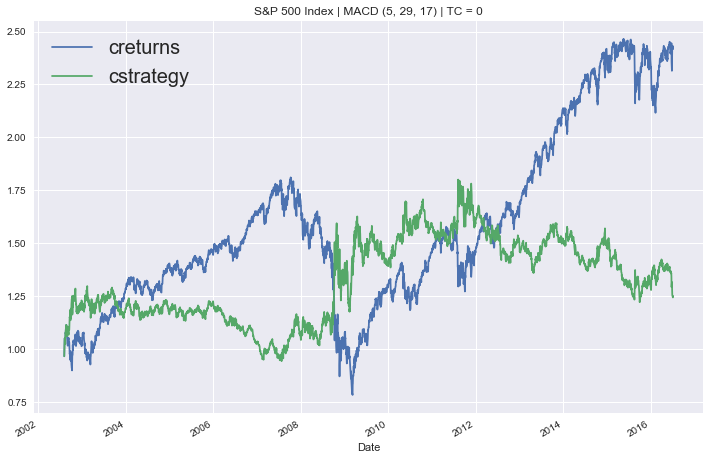

In [115]:
opt_MACD.plot_results()

In [116]:
df_opt=data_opt[4]

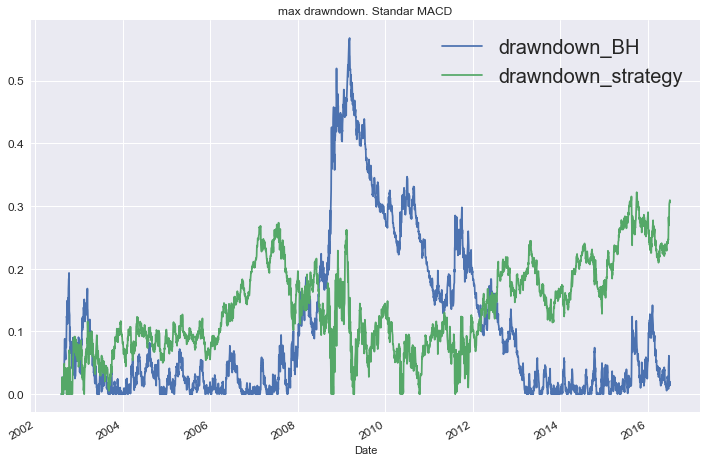

In [117]:
df_opt[["drawndown_BH","drawndown_strategy"]].dropna().plot(figsize = (12, 8), title = "max drawndown. Standar MACD", fontsize = 12)
plt.rc('legend',fontsize=20) # using a size in points
plt.show()

## 4.3. MACD optimized on test

In [118]:
MACD_opt_test = MACD_2("^GSPC", EMA_S = 5, EMA_L = 29, signal_mw = 17, 
                  start = test_start, end = test_end, tc = 0)

[*********************100%***********************]  1 of 1 completed


C:\Users\pcalatayud\Desktop\jupyter\TFM\Chapter 4\MACDBacktester_2.py:72: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [119]:
data_opt_test = MACD_opt_test.test_strategy()

Strategy Performance: 1.259
Hold and Buy Performance: 1.894
Strategy Maximun Drawdown: 0.346
Hold and Buy Drawdown: 0.339
parameters: 5, 29, 17


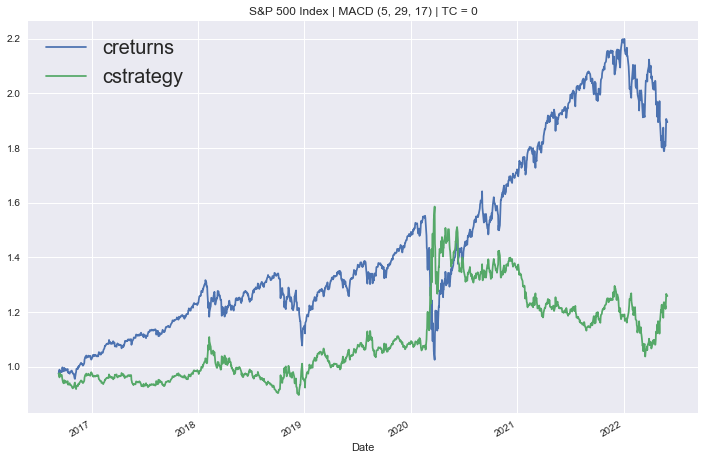

In [120]:
MACD_opt_test.plot_results()

In [123]:
df = data_opt_test[4]

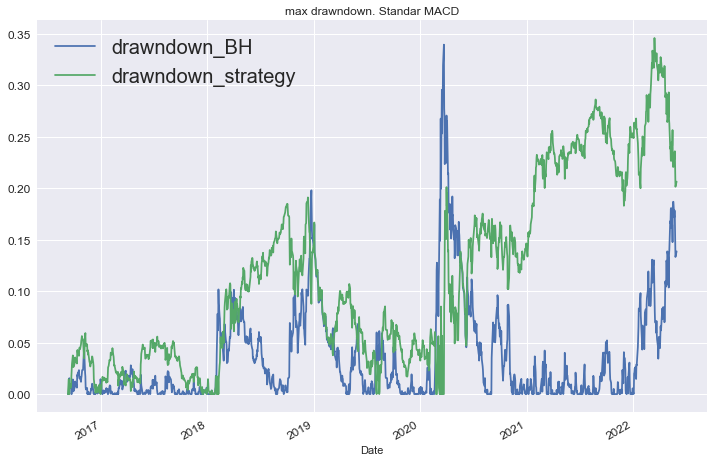

In [124]:
df[["drawndown_BH","drawndown_strategy"]].dropna().plot(figsize = (12, 8), title = "max drawndown. Standar MACD", fontsize = 12)
plt.rc('legend',fontsize=20) # using a size in points
plt.show()

# 4.4. Optimized MACD strategy for all the period

In [127]:
MACD_opt_all = MACD_2("^GSPC", EMA_S = 5, EMA_L = 29, signal_mw = 17, 
                  start = train_start, end = test_end, tc = 0)

[*********************100%***********************]  1 of 1 completed


In [128]:
data_opt_all = MACD_opt_all.test_strategy()

Strategy Performance: 1.706
Hold and Buy Performance: 4.781
Strategy Maximun Drawdown: 0.346
Hold and Buy Drawdown: 0.568
parameters: 5, 29, 17


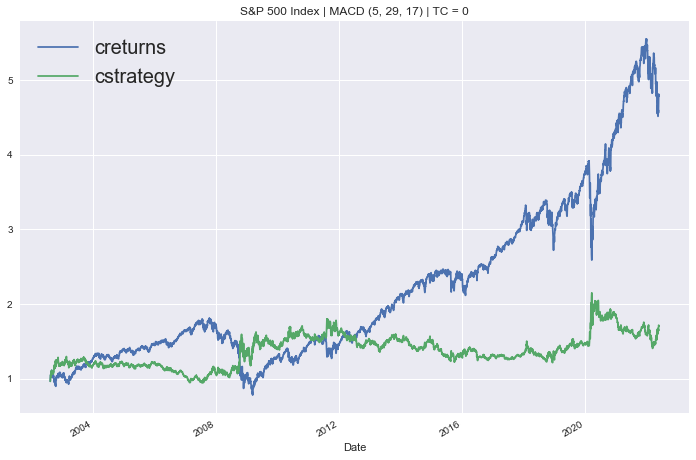

In [129]:
MACD_opt_all.plot_results()

In [131]:
df_all = data_opt_all[4]

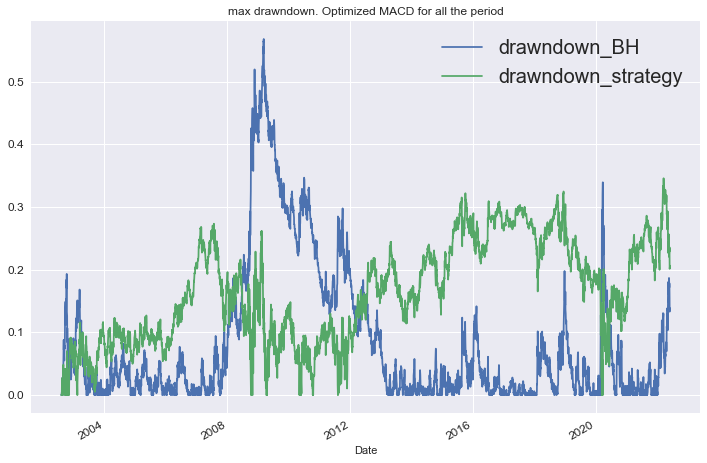

In [134]:
df_all[["drawndown_BH","drawndown_strategy"]].dropna().plot(figsize = (12, 8), title = "max drawndown. Optimized MACD for all the period", fontsize = 12)
plt.rc('legend',fontsize=20) # using a size in points
plt.show()

In [133]:
# The strategy outperform the buy and hold during the crisis - financial crisis 2007 and covid crisis 2020 but in the long
# run the buy and hold strategy is better